In [114]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io # Diperlukan untuk membaca data string jika file diakses dari memori
import math # Untuk perhitungan ukuran grid subplot

# Load the dataset
file_path = "/content/Rekrutmen data - recruitment_data.csv"
df = pd.read_csv(file_path)

# Show the first few rows and summary
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


(   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
 0   26       1               2                0                  3   
 1   39       1               4               12                  3   
 2   48       0               2                3                  2   
 3   34       1               2                5                  2   
 4   30       0               1                6                  1   
 
    DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
 0            26.783828              48          78                91   
 1            25.862694              35          68                80   
 2             9.920805              20          67                13   
 3             6.407751              36          27                70   
 4            43.105343              23          52                85   
 
    RecruitmentStrategy  HiringDecision  
 0                    1               1  
 1                    2               1  
 2    

In [115]:
df.head(4)

Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2                    2               0  
3                    3               0

In [116]:
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")
print(f"Jumlah baris yang hilang (missing value): {df.isnull().any(axis=1).sum()}")


Jumlah baris duplikat: 0
Jumlah baris yang hilang (missing value): 0


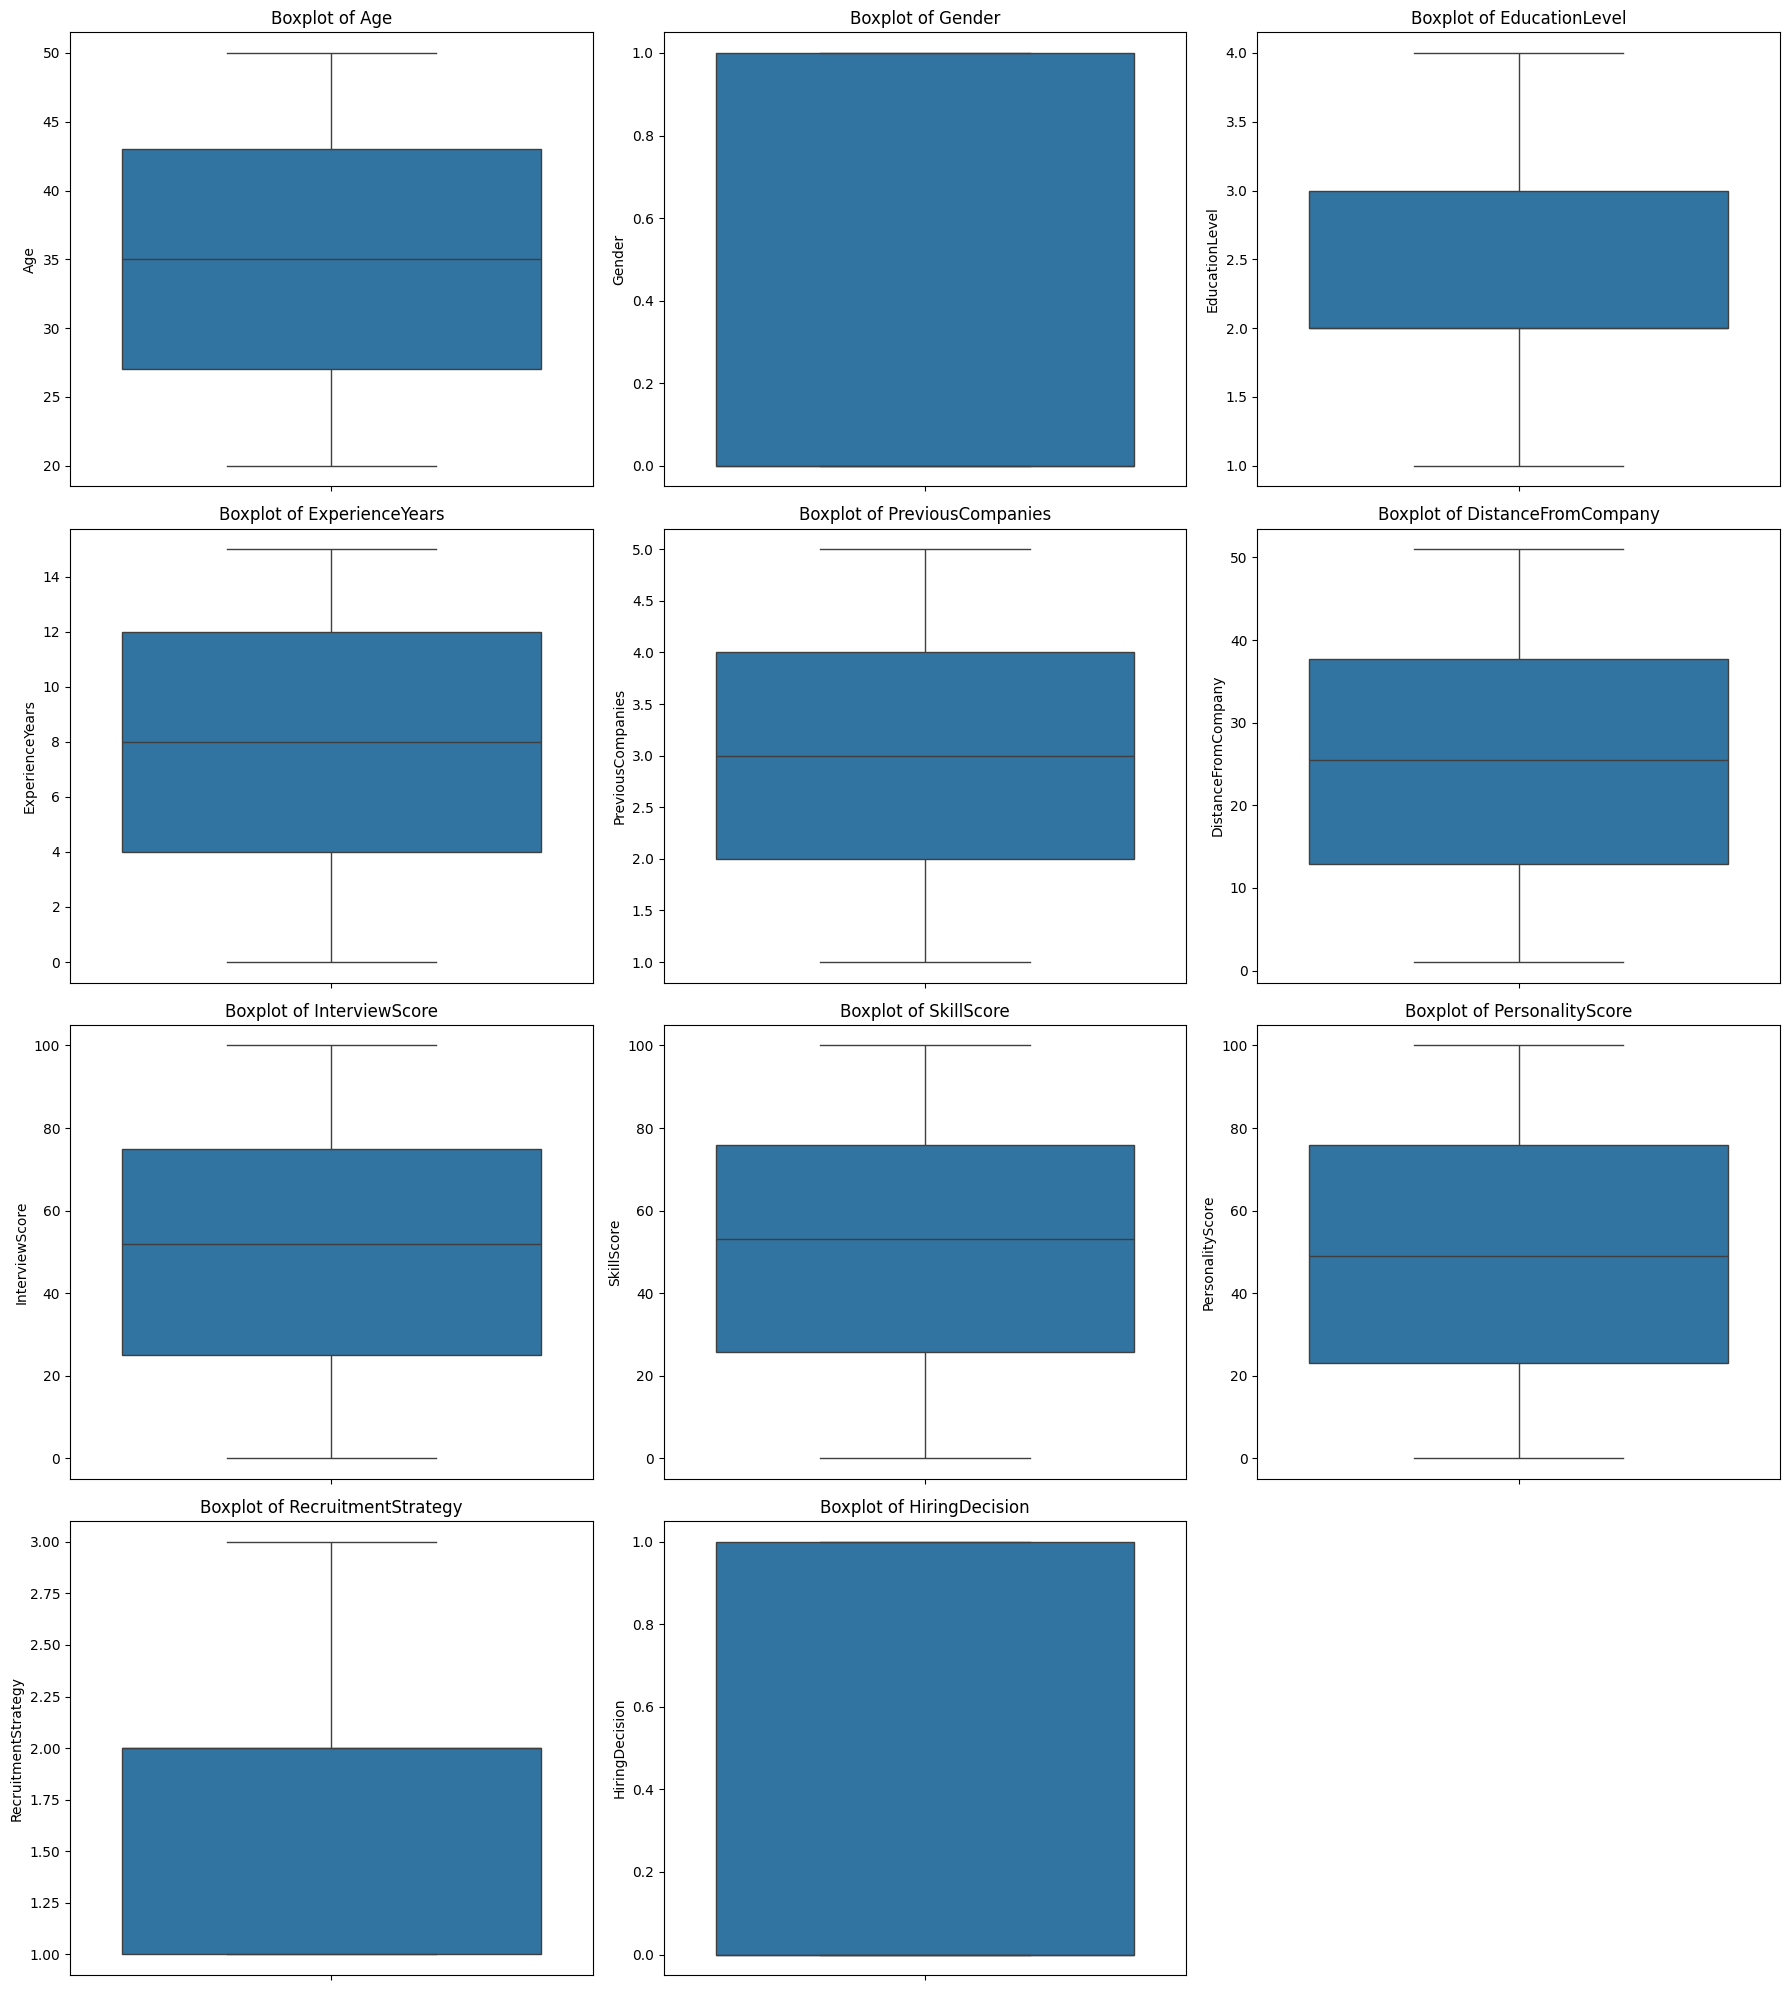

In [117]:
# prompt: make a boxplot for each collumn

import matplotlib.pyplot as plt
# Determine the number of columns to plot
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_plots = len(num_cols)

# Calculate grid size for subplots
cols_per_row = 3 # You can adjust this number
rows_per_plot = math.ceil(num_plots / cols_per_row)

# Create subplots
fig, axes = plt.subplots(rows_per_plot, cols_per_row, figsize=(cols_per_row * 6, rows_per_plot * 5))
axes = axes.flatten() # Flatten the array of axes for easier iteration

# Create boxplots for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('') # Remove x-axis label for clarity

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [118]:
# prompt: Check standard deviation for columns that resulted hiring decision = 1

# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 1]

# Select only the numerical columns (excluding HiringDecision itself)
numerical_cols = df_hired.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols:
    numerical_cols.remove('HiringDecision')

# Calculate the standard deviation for each numerical column in the filtered data
std_devs = df_hired[numerical_cols].std()

# Print the standard deviations
print("Standard Deviation for Columns where HiringDecision = 1:")
std_devs

Standard Deviation for Columns where HiringDecision = 1:


Age                     9.230395
Gender                  0.500445
EducationLevel          0.940267
ExperienceYears         4.344892
PreviousCompanies       1.386384
DistanceFromCompany    14.390860
InterviewScore         30.065245
SkillScore             27.505662
PersonalityScore       29.721124
RecruitmentStrategy     0.646272
dtype: float64

In [119]:
# prompt: check variance for each collums for hiring decision = 1

# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 1]

# Select only the numerical columns (excluding HiringDecision itself)
numerical_cols = df_hired.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols:
    numerical_cols.remove('HiringDecision')

# Calculate the variance for each numerical column in the filtered data
variances = df_hired[numerical_cols].var()

# Print the variances
print("\nVariance for Columns where HiringDecision = 1:")
variances


Variance for Columns where HiringDecision = 1:


Age                     85.200195
Gender                   0.250445
EducationLevel           0.884103
ExperienceYears         18.878087
PreviousCompanies        1.922062
DistanceFromCompany    207.096864
InterviewScore         903.918966
SkillScore             756.561457
PersonalityScore       883.345217
RecruitmentStrategy      0.417668
dtype: float64

TESTING

In [120]:
# prompt: Remove data from each column that resulted in hiring decision = 0. make sure the end result will be 50% hiring decision = 1 and 50% hiring decision =0

import pandas as pd
# Separate the dataframe into hired (1) and rejected (0)
df_hired = df[df['HiringDecision'] == 1].copy()
df_rejected = df[df['HiringDecision'] == 0].copy()

# Determine the number of samples needed for each class to achieve a 50/50 split
num_hired = len(df_hired)
num_rejected_to_keep = num_hired # We want 50% of each

# Check if we have enough rejected samples to keep for a 50/50 split with the hired count
if len(df_rejected) > num_rejected_to_keep:
    # Randomly sample the required number of rejected rows
    df_rejected_balanced = df_rejected.sample(n=num_rejected_to_keep, random_state=42) # Using random_state for reproducibility
else:
    # If not enough rejected samples, keep all of them (this means the target split won't be 50/50,
    # but we'll have as many rejected as possible up to the number of hired)
    print(f"Warning: Not enough rejected samples ({len(df_rejected)}) to match hired samples ({num_hired}) for a perfect 50/50 split.")
    print(f"Keeping all {len(df_rejected)} rejected samples.")
    df_rejected_balanced = df_rejected.copy()

# Concatenate the hired and balanced rejected dataframes
df_balanced = pd.concat([df_hired, df_rejected_balanced], ignore_index=True)

# Shuffle the final dataframe to mix the hired and rejected rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new distribution of HiringDecision
print("\nDistribution of HiringDecision in the balanced dataset:")
print(df_balanced['HiringDecision'].value_counts())

# Display the head of the balanced dataframe
print("\nHead of the balanced dataframe:")
print(df_balanced.head())

# Now, you can continue your analysis using df_balanced
# For example, you could visualize the distributions again on this balanced data
# (The plotting code from the original cells could be adapted to use df_balanced)


Distribution of HiringDecision in the balanced dataset:
HiringDecision
0    465
1    465
Name: count, dtype: int64

Head of the balanced dataframe:
   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   30       0               2                1                  4   
1   48       1               2                9                  2   
2   50       0               4               12                  4   
3   20       0               3               14                  1   
4   20       1               4                9                  2   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            35.745919               2          89                57   
1            49.804301              52          42                82   
2            21.115352              83          51                31   
3             5.719874              72          82                53   
4            37.841323              76          27                27  

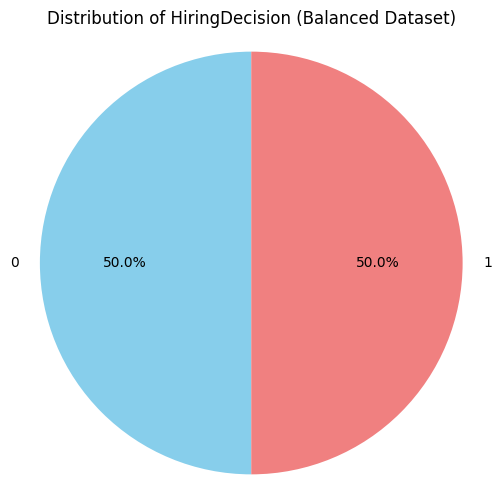

In [121]:
# prompt: create a pie chart using df_balanced

import matplotlib.pyplot as plt
# Count the occurrences of each HiringDecision
hiring_counts = df_balanced['HiringDecision'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(hiring_counts, labels=hiring_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of HiringDecision (Balanced Dataset)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

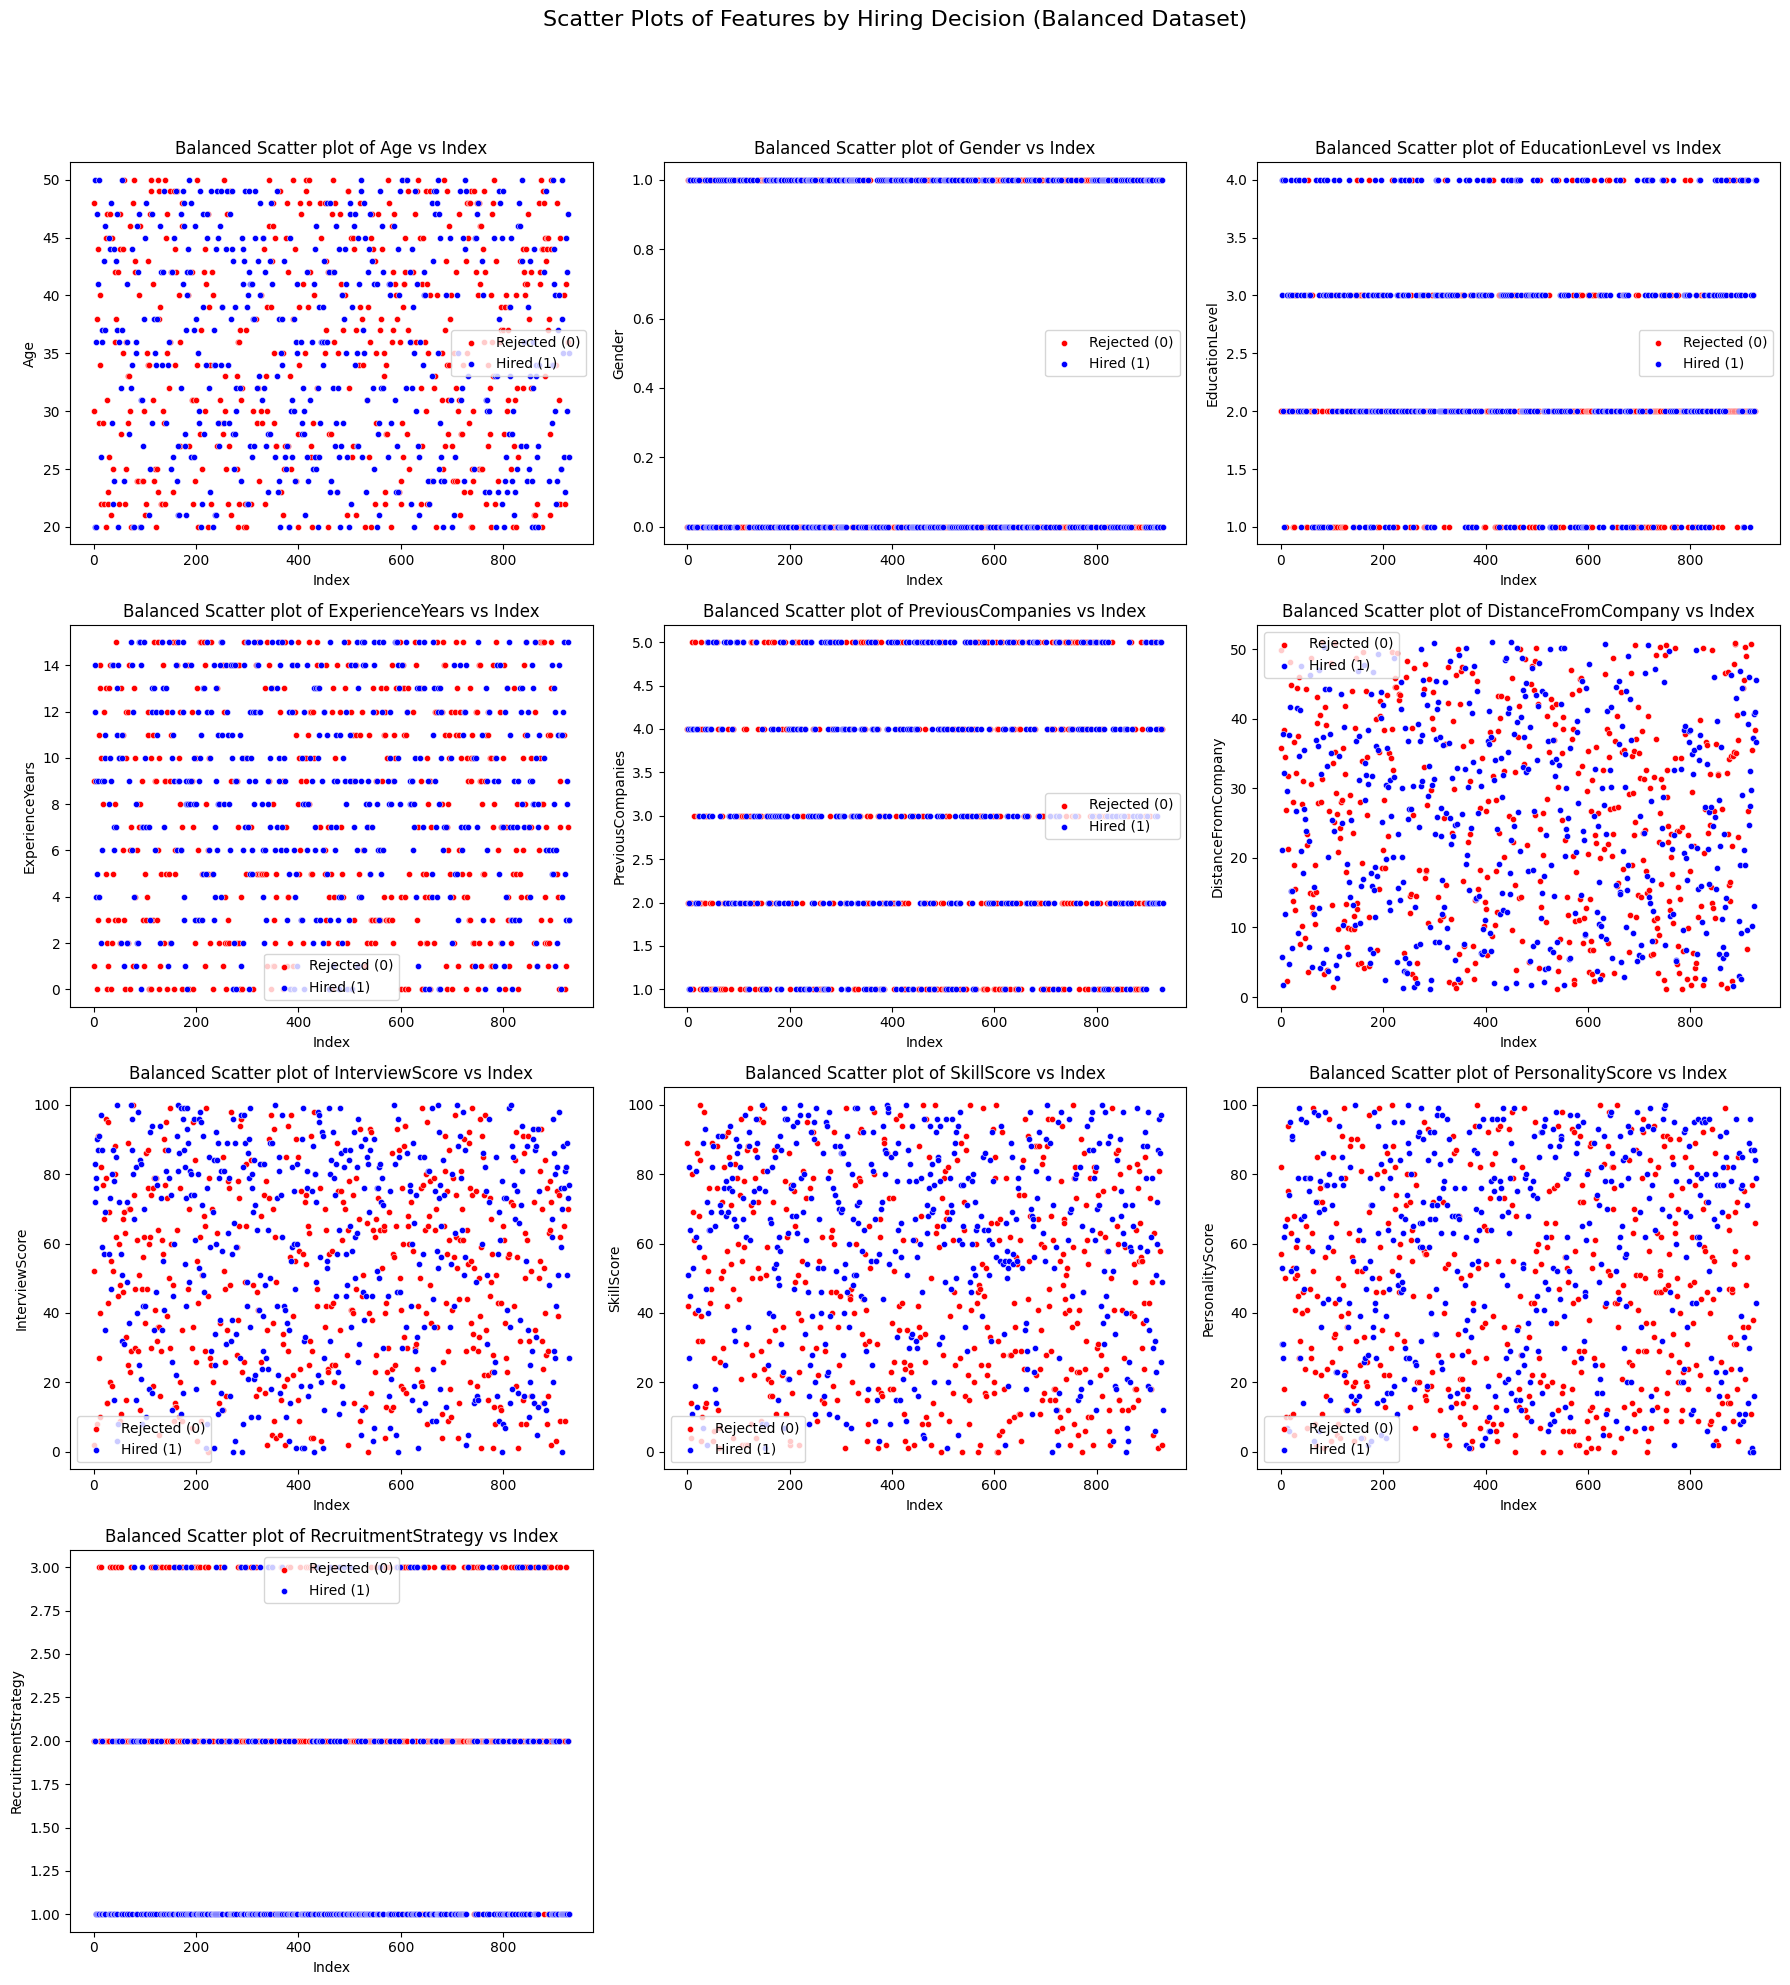

In [122]:
# prompt: create a scatterplot using df_balanced. hiring decision = 1 is blue and hiring decision = 0 is red

import matplotlib.pyplot as plt
# Identify numerical columns in the balanced dataframe, excluding 'HiringDecision'
numerical_cols_balanced_scatter = df_balanced.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols_balanced_scatter:
    numerical_cols_balanced_scatter.remove('HiringDecision')

# Determine the number of columns to plot
num_scatter_plots_balanced = len(numerical_cols_balanced_scatter)

# Calculate grid size for subplots
cols_per_row_scatter_balanced = 3 # You can adjust this number
rows_per_plot_scatter_balanced = math.ceil(num_scatter_plots_balanced / cols_per_row_scatter_balanced)

# Create subplots for scatter plots using the balanced data
fig_scatter_balanced, axes_scatter_balanced = plt.subplots(rows_per_plot_scatter_balanced, cols_per_row_scatter_balanced,
                                                          figsize=(cols_per_row_scatter_balanced * 6, rows_per_plot_scatter_balanced * 5))
axes_scatter_balanced = axes_scatter_balanced.flatten() # Flatten the array of axes

# Create scatter plots for each numerical column against its index (or just plotted)
for i, col in enumerate(numerical_cols_balanced_scatter):
    # Scatter plot for HiringDecision = 0 (Red)
    sns.scatterplot(data=df_balanced[df_balanced['HiringDecision'] == 0], x=df_balanced[df_balanced['HiringDecision'] == 0].index, y=col, ax=axes_scatter_balanced[i], color='red', label='Rejected (0)', s=20)

    # Scatter plot for HiringDecision = 1 (Blue)
    sns.scatterplot(data=df_balanced[df_balanced['HiringDecision'] == 1], x=df_balanced[df_balanced['HiringDecision'] == 1].index, y=col, ax=axes_scatter_balanced[i], color='blue', label='Hired (1)', s=20)

    axes_scatter_balanced[i].set_title(f'Balanced Scatter plot of {col} vs Index', fontsize=12)
    axes_scatter_balanced[i].set_xlabel('Index', fontsize=10)
    axes_scatter_balanced[i].set_ylabel(col, fontsize=10)
    axes_scatter_balanced[i].legend() # Add legend to show color mapping

# Hide any unused subplots
for j in range(i + 1, len(axes_scatter_balanced)):
    fig_scatter_balanced.delaxes(axes_scatter_balanced[j])

# Adjust layout and display plot
plt.suptitle('Scatter Plots of Features by Hiring Decision (Balanced Dataset)', y=1.02, fontsize=16) # Main title
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

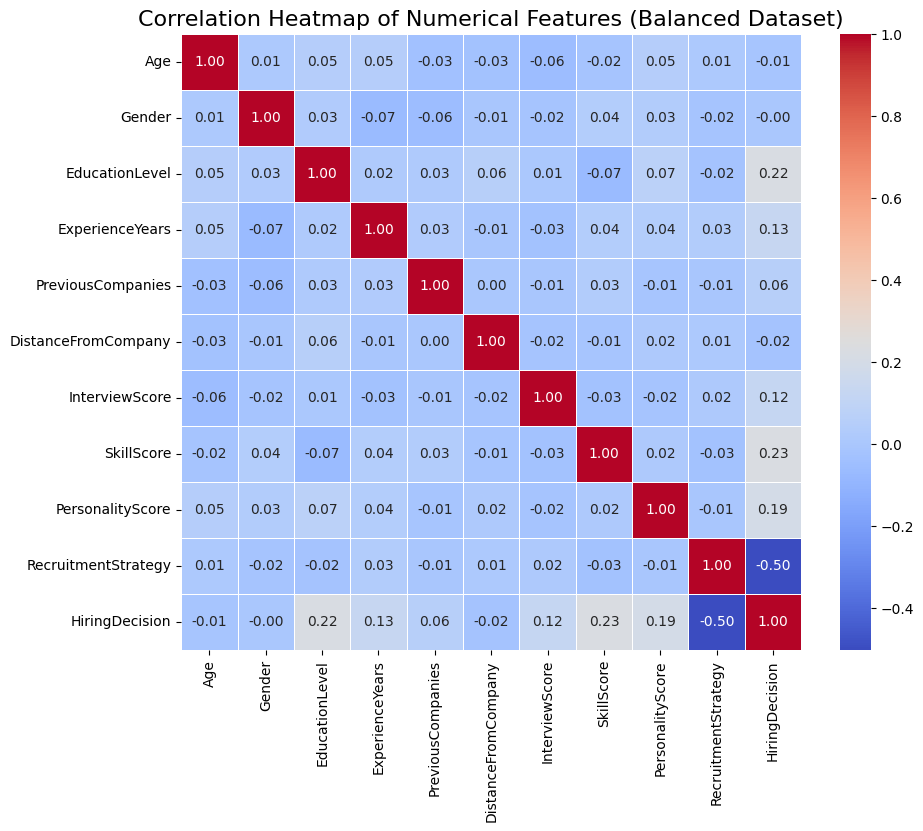

In [123]:
# prompt: create a heatmap correllation with df_balanced

import matplotlib.pyplot as plt
# Select only numerical columns from the balanced dataframe
numerical_cols_balanced = df_balanced.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols_balanced.corr()

# Create the heatmap
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features (Balanced Dataset)', fontsize=16)
plt.show()

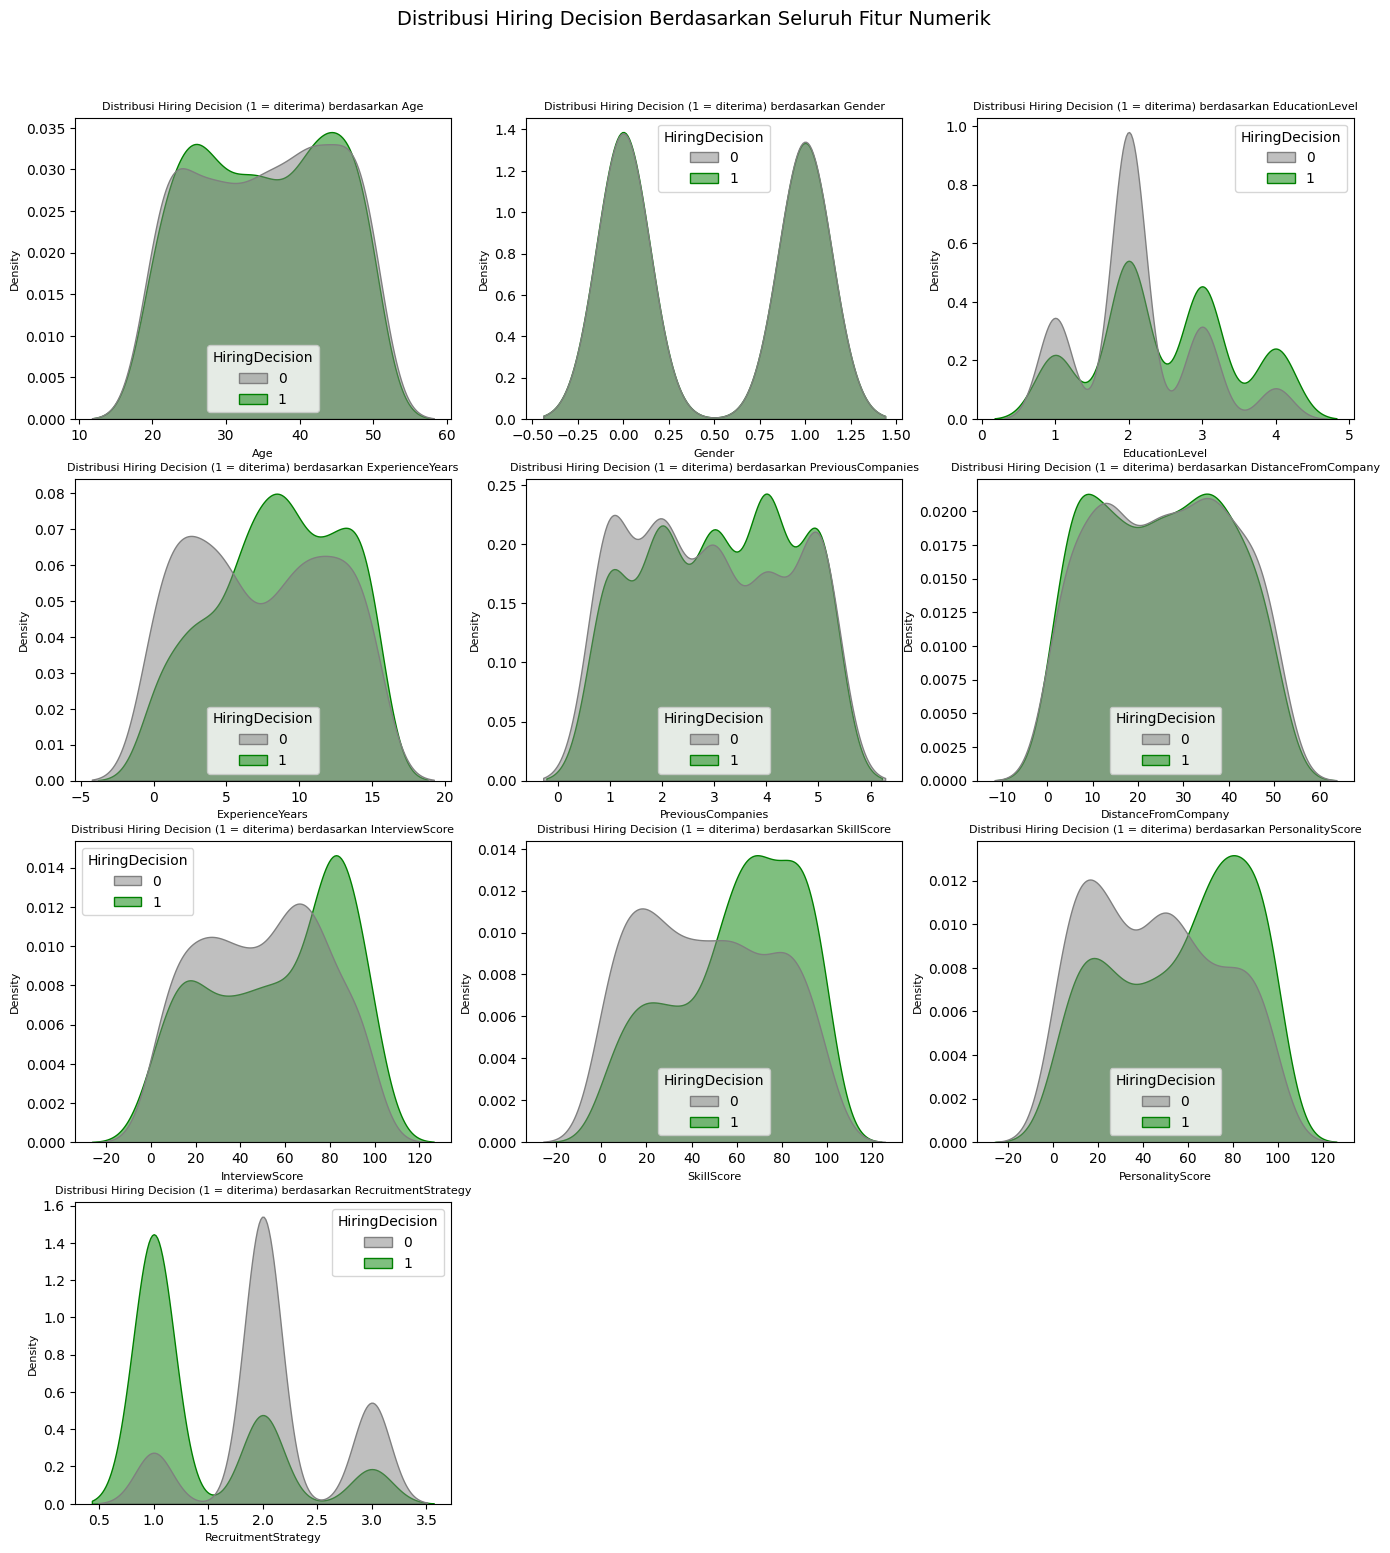

In [124]:
numerical_cols = df_balanced.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols: # Pastikan 'HiringDecision' tidak di-plot sebagai fitur numerik
    numerical_cols.remove('HiringDecision')

if not numerical_cols:
    print("Tidak ada kolom numerik yang ditemukan untuk di-plot distribusinya.")
else:
    # Langkah 3: Menentukan ukuran grid untuk subplot secara dinamis
    num_plots = len(numerical_cols)
    num_cols = 3  # Anda bisa mengubah ini untuk mengatur berapa banyak plot per baris
    num_rows = math.ceil(num_plots / num_cols)

    # Membuat figure dan axes untuk semua subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5.5, num_rows * 4.5))
    axes = axes.flatten() # Meratakan array axes agar lebih mudah diiterasi dalam loop

    # Variabel untuk menyimpan handle dan label legend dari plot pertama
    # Ini akan digunakan untuk membuat satu legend global
    handles, labels = None, None

    custom_palette = {1: 'green', 0: 'grey'}

    # Langkah 4: Loop melalui setiap kolom numerik dan buat plot KDE
    for i, col in enumerate(numerical_cols):
        if i < len(axes): # Memastikan kita tidak melebihi jumlah subplot yang tersedia
            sns.kdeplot(data=df_balanced, x=col, hue='HiringDecision', fill=True,
                        common_norm=False, alpha=0.5, ax=axes[i],palette=custom_palette)
            axes[i].set_title(f'Distribusi Hiring Decision (1 = diterima) berdasarkan {col}', fontsize=8)
            axes[i].set_xlabel(col, fontsize=8)
            axes[i].set_ylabel('Density', fontsize=8)
         # --- BAGIAN PENTING: Mengambil handles dan Menentukan Label Legend Kustom ---
            # Mengambil handles dan label default dari plot yang baru dibuat
            handles, default_labels = axes[i].get_legend_handles_labels()


    # Langkah 5: Hapus subplot yang kosong jika ada (jika jumlah plot tidak pas dengan grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Langkah 6: Tambahkan Legend Tunggal untuk Seluruh Gambar (Figure)
    if handles and labels:
        fig.legend(handles=handles, labels=labels, title='HiringDecision',
                   loc='upper right', bbox_to_anchor=(1.08, 1), # Menempatkan legend di luar area plot utama
                   fontsize=9, title_fontsize=10)

    # Langkah 7: Beri Judul Keseluruhan dan Simpan Plot
    plt.suptitle('Distribusi Hiring Decision Berdasarkan Seluruh Fitur Numerik', y=0.94, fontsize=14)

In [125]:
# Buat tabel distribusi deskriptif terpisah berdasarkan HiringDecision
distribution_table =df_balanced.groupby('HiringDecision')[[
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany',
]].describe().transpose()
print("Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)")
distribution_table


Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)


HiringDecision                      0           1
Age                 count  465.000000  465.000000
                    mean    35.352688   35.174194
                    std      9.371426    9.230395
                    min     20.000000   20.000000
                    25%     27.000000   27.000000
                    50%     36.000000   35.000000
                    75%     44.000000   44.000000
                    max     50.000000   50.000000
ExperienceYears     count  465.000000  465.000000
                    mean     7.341935    8.541935
                    std      4.831790    4.344892
                    min      0.000000    0.000000
                    25%      3.000000    6.000000
                    50%      7.000000    9.000000
                    75%     12.000000   12.000000
                    max     15.000000   15.000000
InterviewScore      count  465.000000  465.000000
                    mean    49.645161   56.800000
                    std     27.410373   30.065245
                    min      0.000000    0.000000
                    25%     26.000000   31.000000
                    50%     51.000000   62.000000
                    75%     72.000000   83.000000
                    max    100.000000  100.000000
SkillScore          count  465.000000  465.000000
                    mean    46.731183   60.032258
                    std     29.372437   27.505662
                    min      0.000000    0.000000
                    25%     21.000000   39.000000
                    50%     45.000000   65.000000
                    75%     73.000000   83.000000
                    max    100.000000  100.000000
PersonalityScore    count  465.000000  465.000000
                    mean    45.311828   56.793548
                    std     28.958866   29.721124
                    min      0.000000    0.000000
                    25%     20.000000   30.000000
                    50%     45.000000   63.000000
                    75%     70.000000   82.000000
                    max    100.000000  100.000000
DistanceFromCompany count  465.000000  465.000000
                    mean    25.813450   25.140583
                    std     14.523866   14.390860
                    min      1.103826    1.197997
                    25%     13.176417   12.150491
                    50%     26.369488   25.405877
                    75%     37.946523   37.120569
                    max     50.966814   50.992462

**COBA MODELLING TESITNG 50% HD 1:50% HD 0**

In [126]:
# prompt: Split df_balanced data 0.8 for training and 0.2 for test with the column Skillscore, ExperienceYears, EducationLevel, InterviewScore, PersonalityScore, PreviousCompanies for machine learning. after that, smote the training set and scale it

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
features = ['SkillScore', 'ExperienceYears', 'EducationLevel', 'InterviewScore', 'PersonalityScore', 'PreviousCompanies']
X = df_balanced[features]
y = df_balanced['HiringDecision']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Use stratify to maintain the class distribution

print("Original training set shape:", X_train.shape, y_train.shape)
print("Original testing set shape:", X_test.shape, y_test.shape)
print("Original training set distribution:\n", y_train.value_counts())
print("Original testing set distribution:\n", y_test.value_counts())

# Apply SMOTE to the training set
# Ensure you only apply SMOTE to the training data to avoid data leakage
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nTraining set shape after SMOTE:", X_train_smote.shape, y_train_smote.shape)
print("Training set distribution after SMOTE:\n", y_train_smote.value_counts())

# Scale the SMOTEd training data and the original test data
scaler = StandardScaler()

# Fit the scaler on the SMOTEd training data and transform it
X_train_scaled = scaler.fit_transform(X_train_smote)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames (optional, but can be helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

print("\nScaled training data head:")
print(X_train_scaled.head())
print("\nScaled testing data head:")
print(X_test_scaled.head())

print("\nData splitting, SMOTE, and scaling completed.")


Original training set shape: (744, 6) (744,)
Original testing set shape: (186, 6) (186,)
Original training set distribution:
 HiringDecision
1    372
0    372
Name: count, dtype: int64
Original testing set distribution:
 HiringDecision
0    93
1    93
Name: count, dtype: int64

Training set shape after SMOTE: (744, 6) (744,)
Training set distribution after SMOTE:
 HiringDecision
1    372
0    372
Name: count, dtype: int64

Scaled training data head:
   SkillScore  ExperienceYears  EducationLevel  InterviewScore  \
0    1.319266         0.619692        1.902614       -1.486964   
1    0.090557        -1.749088       -0.340722        0.040118   
2    1.114481        -1.749088        1.902614        0.873071   
3   -1.240545         1.265722       -0.340722        1.116016   
4    0.329472         1.050379       -0.340722       -0.272240   

   PersonalityScore  PreviousCompanies  
0         -0.702047            1.41713  
1         -0.201610            0.00946  
2         -0.568597       

Logistic Regression Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68        93
           1       0.68      0.58      0.63        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.65       186
weighted avg       0.66      0.66      0.65       186


Confusion Matrix:
[[68 25]
 [39 54]]


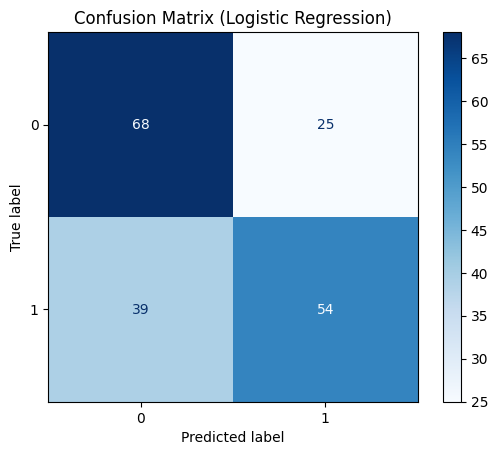


AUC: 0.7244


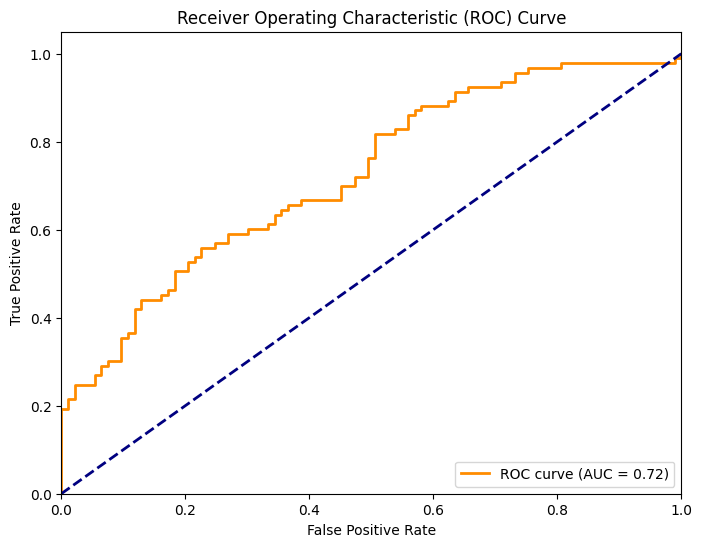


Logistic Regression model training and evaluation completed.


In [127]:
# prompt: Create a machine learning model using logistic regression

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model using the scaled SMOTEd training data
log_reg.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# ROC Curve and AUC
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print(f"\nAUC: {auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\nLogistic Regression model training and evaluation completed.")


Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters found by GridSearchCV:
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Best cross-validation score (ROC AUC):
0.7162074506939371

Evaluation of the best Logistic Regression model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68        93
           1       0.68      0.58      0.63        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.65       186
weighted avg       0.66      0.66      0.65       186


Confusion Matrix (Tuned Logistic Regression):
[[68 25]
 [39 54]]


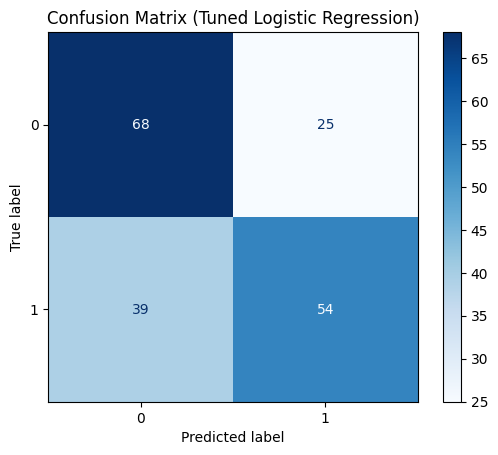


AUC (Tuned Logistic Regression): 0.7247


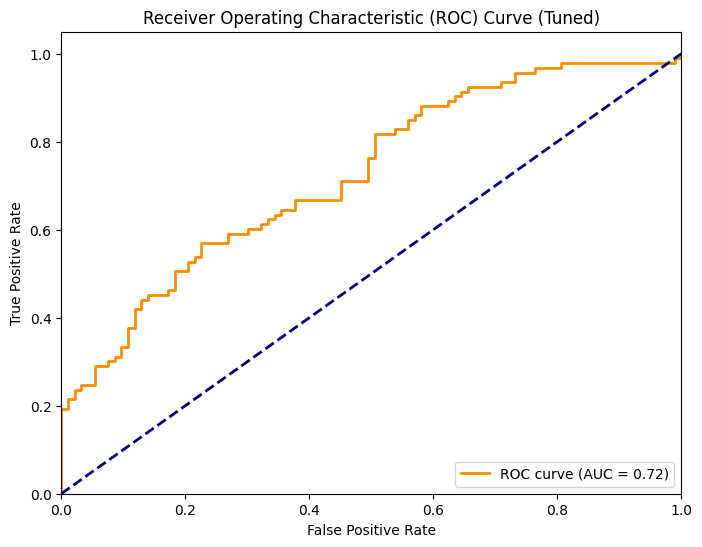


Hyperparameter tuning completed.


In [128]:
# prompt: From the result logistic regression, do hyper parameter tuning for the machine learning model for logistic regression

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline # Use ImbPipeline for SMOTE within the pipeline

# Define the parameter grid for GridSearchCV
# C is the inverse of regularization strength. Smaller values specify stronger regularization.
# penalty specifies the norm used in the penalization (L1 or L2).
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'], # L1 penalty requires solver 'liblinear' or 'saga' and might not work with all solvers. 'l2' is standard.
    'logisticregression__solver': ['liblinear', 'lbfgs'] # Common solvers for small and large datasets respectively
}

# Create a pipeline that includes scaling and the Logistic Regression model
# SMOTE is applied to the training data BEFORE scaling in the previous code.
# If you want to incorporate SMOTE into the GridSearchCV pipeline, you need ImbPipeline
# However, applying SMOTE inside the inner loop of cross-validation (which GridSearchCV does)
# is the correct way to prevent data leakage. Let's create a pipeline including SMOTE.
# Note: For this to work, SMOTE needs to be imported from imblearn.pipeline

# Define the pipeline with SMOTE, Scaling, and Logistic Regression
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE will be applied during the fit on each training fold
    ('scaler', StandardScaler()),       # Scaling will be applied after SMOTE
    ('logisticregression', LogisticRegression(random_state=42)) # The model to tune
])


# Initialize GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='roc_auc', # Or 'accuracy', 'f1', etc., depending on your objective
                           verbose=1,
                           n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The SMOTE step in the pipeline will handle resampling within each cross-validation fold
grid_search.fit(X_train, y_train) # Use original X_train, y_train here

# Get the best parameters and the best score
print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("\nBest cross-validation score (ROC AUC):")
print(grid_search.best_score_)

# Get the best model from the grid search
best_log_reg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned = best_log_reg_model.predict(X_test) # The pipeline handles scaling internally for prediction
y_prob_tuned = best_log_reg_model.predict_proba(X_test)[:, 1]

print("\nEvaluation of the best Logistic Regression model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix (Tuned Logistic Regression):")
print(cm_tuned)

# Plot Confusion Matrix for tuned model
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=best_log_reg_model.classes_)
disp_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.show()

# ROC Curve and AUC for tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_prob_tuned)
auc_tuned = roc_auc_score(y_test, y_prob_tuned)

print(f"\nAUC (Tuned Logistic Regression): {auc_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned)')
plt.legend(loc="lower right")
plt.show()

print("\nHyperparameter tuning completed.")



SVM Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.70      0.66        93
           1       0.66      0.59      0.62        93

    accuracy                           0.65       186
   macro avg       0.65      0.65      0.64       186
weighted avg       0.65      0.65      0.64       186


Confusion Matrix (SVM):
[[65 28]
 [38 55]]


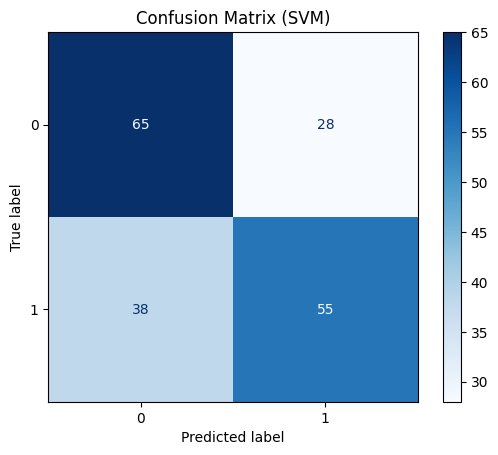


SVM AUC: 0.7229


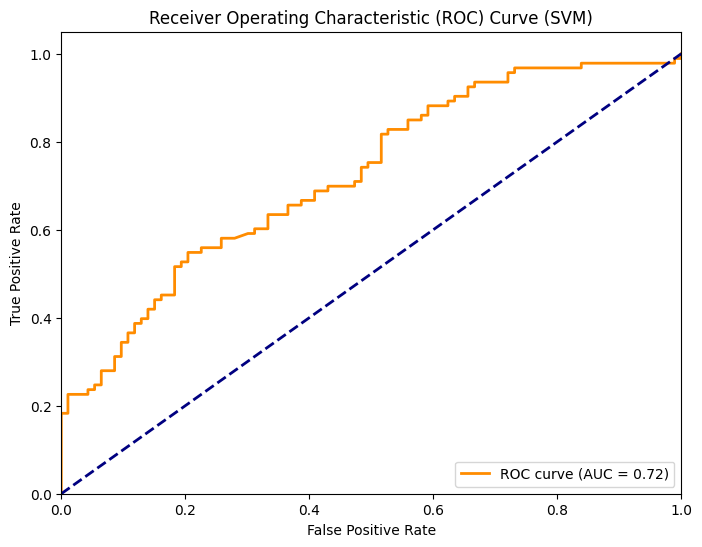


SVM model training and evaluation completed.


In [129]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using SVM

import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Initialize the SVM model
# You can start with a linear kernel or try an RBF kernel (common choices)
# Let's start with a linear kernel
svm_model = SVC(kernel='linear', random_state=42, probability=True) # probability=True allows predict_proba

# Train the model using the scaled SMOTEd training data
svm_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
print("\nSVM Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (SVM):")
print(cm_svm)

# Plot Confusion Matrix for SVM
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM)')
plt.show()

# ROC Curve and AUC for SVM
# Get probability scores for the positive class
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print(f"\nSVM AUC: {auc_svm:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

print("\nSVM model training and evaluation completed.")



Starting GridSearchCV for SVM...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found by GridSearchCV for SVM:
{'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel': 'rbf'}

Best cross-validation score (ROC AUC) for SVM:
0.7321100560019479

Evaluation of the best SVM model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        93
           1       0.70      0.55      0.61        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.65       186
weighted avg       0.66      0.66      0.65       186


Confusion Matrix (Tuned SVM):
[[71 22]
 [42 51]]


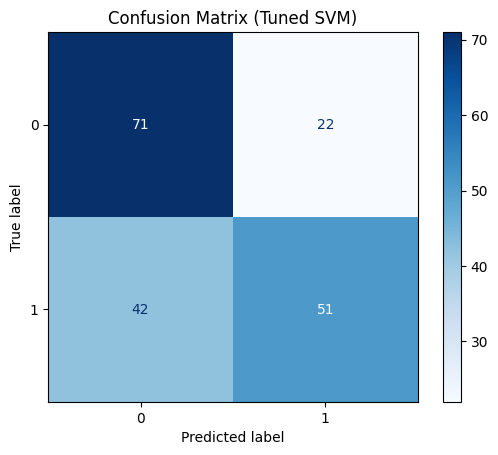


AUC (Tuned SVM): 0.7212


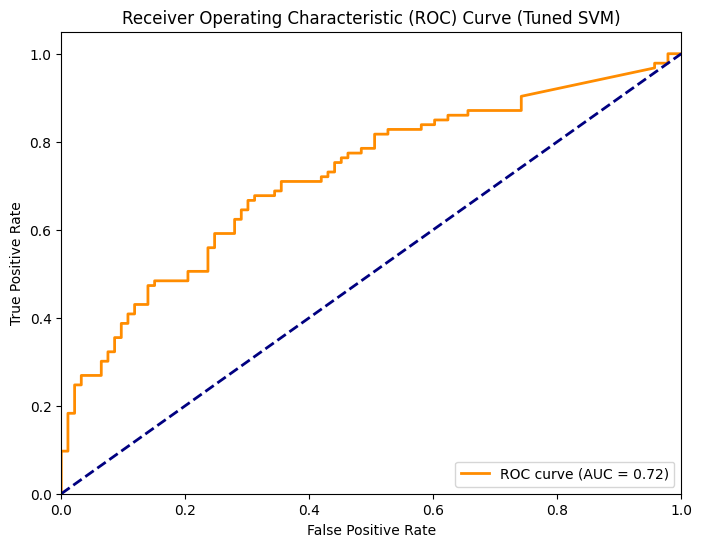


SVM Hyperparameter tuning completed.


In [130]:
# prompt: From the result of SVM, do hyper parameter tuning for the machine learning model for SVM

import matplotlib.pyplot as plt
# --- Hyperparameter Tuning for SVM using GridSearchCV ---

# Define the parameter grid for GridSearchCV for SVM
# C: Regularization parameter. Smaller C means stronger regularization.
# kernel: Specifies the kernel type to be used in the algorithm. 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' (precomputed not applicable here).
# gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'. Affects how far the influence of a single training example reaches. 'scale' (default) uses 1 / (n_features * X.var()), 'auto' uses 1 / n_features.
param_grid_svm = {
    'svc__C': [0.1, 1, 10, 100],          # Explore different regularization strengths
    'svc__kernel': ['linear', 'rbf'],   # Explore different kernels
    'svc__gamma': ['scale', 'auto', 0.1, 1] # Explore different gamma values (relevant for rbf)
}

# Create a pipeline that includes SMOTE, Scaling, and the SVM model
# This ensures that SMOTE is applied only within the cross-validation loop on the training fold
# and scaling is applied after SMOTE but before the SVM model.
pipeline_svm = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE
    ('svc', SVC(random_state=42, probability=True)) # SVM model (probability=True needed for ROC AUC)
])

# Initialize GridSearchCV for SVM
# cv=5 means 5-fold cross-validation
# scoring='roc_auc' is suitable for imbalanced datasets or when prioritizing ranking performance
grid_search_svm = GridSearchCV(estimator=pipeline_svm,
                               param_grid=param_grid_svm,
                               cv=5,
                               scoring='roc_auc',
                               verbose=2, # Increase verbosity to see progress
                               n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The pipeline handles SMOTE and scaling internally for each fold
print("\nStarting GridSearchCV for SVM...")
grid_search_svm.fit(X_train, y_train) # Use original X_train, y_train here

# Get the best parameters and the best score for SVM
print("\nBest parameters found by GridSearchCV for SVM:")
print(grid_search_svm.best_params_)
print("\nBest cross-validation score (ROC AUC) for SVM:")
print(grid_search_svm.best_score_)

# Get the best SVM model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Evaluate the best SVM model on the test set
# The pipeline handles scaling internally for prediction
y_pred_svm_tuned = best_svm_model.predict(X_test)
y_prob_svm_tuned = best_svm_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best SVM model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm_tuned))

# Confusion Matrix for tuned SVM model
cm_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned)
print("\nConfusion Matrix (Tuned SVM):")
print(cm_svm_tuned)

# Plot Confusion Matrix for tuned SVM model
disp_svm_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_svm_tuned, display_labels=best_svm_model.classes_)
disp_svm_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned SVM)')
plt.show()

# ROC Curve and AUC for tuned SVM model
fpr_svm_tuned, tpr_svm_tuned, thresholds_svm_tuned = roc_curve(y_test, y_prob_svm_tuned)
auc_svm_tuned = roc_auc_score(y_test, y_prob_svm_tuned)

print(f"\nAUC (Tuned SVM): {auc_svm_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_tuned, tpr_svm_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned SVM)')
plt.legend(loc="lower right")
plt.show()

print("\nSVM Hyperparameter tuning completed.")



Random Forest Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66        93
           1       0.65      0.59      0.62        93

    accuracy                           0.64       186
   macro avg       0.64      0.64      0.64       186
weighted avg       0.64      0.64      0.64       186


Confusion Matrix (Random Forest):
[[64 29]
 [38 55]]


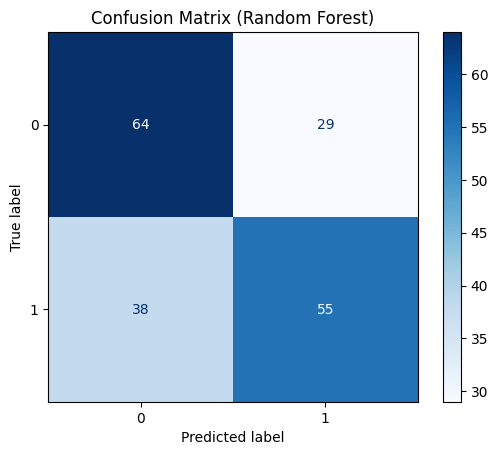


Random Forest AUC: 0.6977


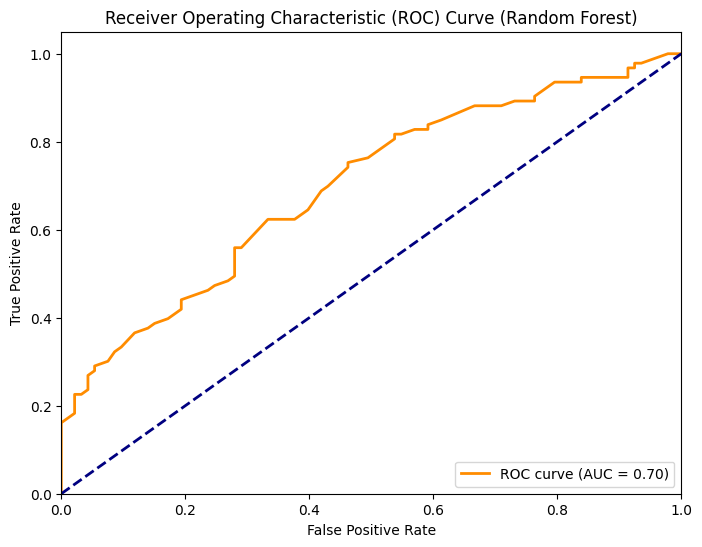


Random Forest model training and evaluation completed.


In [131]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using Random forest

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
# You can tune hyperparameters like n_estimators (number of trees)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled SMOTEd training data
rf_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):")
print(cm_rf)

# Plot Confusion Matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# ROC Curve and AUC for Random Forest
# Get probability scores for the positive class
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"\nRandom Forest AUC: {auc_rf:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

print("\nRandom Forest model training and evaluation completed.")


Starting GridSearchCV for Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters found by GridSearchCV for Random Forest:
{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 50}

Best cross-validation score (ROC AUC) for Random Forest:
0.753081568054541

Evaluation of the best Random Forest model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        93
           1       0.64      0.60      0.62        93

    accuracy                           0.63       186
   macro avg       0.63      0.63      0.63       186
weighted avg       0.63      0.63      0.63       186


Confusion Matrix (Tuned Random Forest):
[[62 31]
 [37 56]]


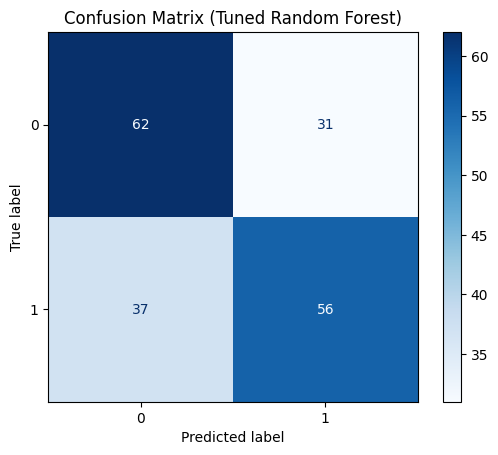


AUC (Tuned Random Forest): 0.7004


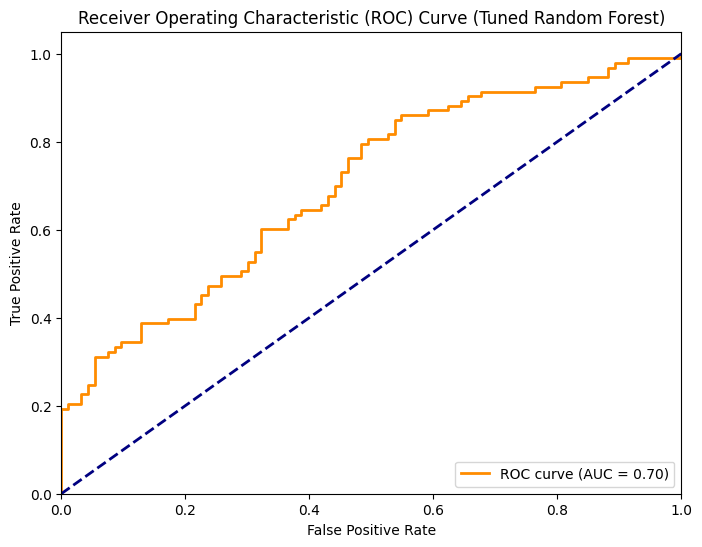


Random Forest Hyperparameter tuning completed.


In [132]:
# prompt: From the result of random forest, do hyper parameter tuning for the machine learning model for random forest

import matplotlib.pyplot as plt
# --- Hyperparameter Tuning for Random Forest using GridSearchCV ---

# Define the parameter grid for GridSearchCV for Random Forest
# n_estimators: The number of trees in the forest.
# max_depth: The maximum depth of the tree. Helps control overfitting.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
param_grid_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200], # Explore different numbers of trees
    'randomforestclassifier__max_depth': [None, 10, 20, 30], # Explore different max depths (None means unlimited)
    'randomforestclassifier__min_samples_split': [2, 5, 10], # Explore different minimum samples to split
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],   # Explore different minimum samples per leaf
    'randomforestclassifier__criterion': ['gini', 'entropy'] # Explore different split criteria
}

# Create a pipeline that includes SMOTE, Scaling, and the Random Forest model
# This ensures that SMOTE and scaling are handled correctly within cross-validation
pipeline_rf = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE (can be beneficial for some features, though RF is less sensitive)
    ('randomforestclassifier', RandomForestClassifier(random_state=42)) # Random Forest model
])

# Initialize GridSearchCV for Random Forest
# cv=5 means 5-fold cross-validation
# scoring='roc_auc' is suitable for imbalanced datasets or when prioritizing ranking performance
grid_search_rf = GridSearchCV(estimator=pipeline_rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='roc_auc',
                              verbose=2, # Increase verbosity to see progress
                              n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The pipeline handles SMOTE and scaling internally for each fold
print("\nStarting GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train) # Use original X_train, y_train here

# Get the best parameters and the best score for Random Forest
print("\nBest parameters found by GridSearchCV for Random Forest:")
print(grid_search_rf.best_params_)
print("\nBest cross-validation score (ROC AUC) for Random Forest:")
print(grid_search_rf.best_score_)

# Get the best Random Forest model from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
# The pipeline handles scaling internally for prediction
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_prob_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best Random Forest model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix for tuned Random Forest model
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print("\nConfusion Matrix (Tuned Random Forest):")
print(cm_rf_tuned)

# Plot Confusion Matrix for tuned Random Forest model
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned, display_labels=best_rf_model.classes_)
disp_rf_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.show()

# ROC Curve and AUC for tuned Random Forest model
fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test, y_prob_rf_tuned)
auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)

print(f"\nAUC (Tuned Random Forest): {auc_rf_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned Random Forest)')
plt.legend(loc="lower right")
plt.show()

print("\nRandom Forest Hyperparameter tuning completed.")



Decision Tree Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66        93
           1       0.66      0.66      0.66        93

    accuracy                           0.66       186
   macro avg       0.66      0.66      0.66       186
weighted avg       0.66      0.66      0.66       186


Confusion Matrix (Decision Tree):
[[62 31]
 [32 61]]


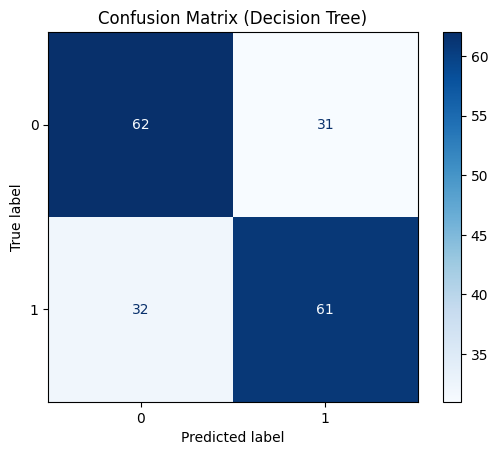


Decision Tree AUC: 0.6613


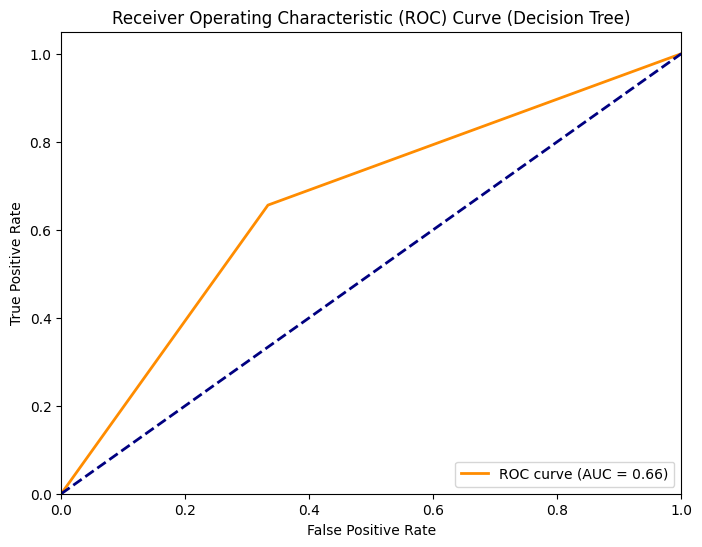


Decision Tree model training and evaluation completed.


In [133]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using decision tree

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
# You can tune hyperparameters like criterion ('gini' or 'entropy') and max_depth
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the scaled SMOTEd training data
dt_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the Decision Tree model
print("\nDecision Tree Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Decision Tree):")
print(cm_dt)

# Plot Confusion Matrix for Decision Tree
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_model.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

# ROC Curve and AUC for Decision Tree
# Get probability scores for the positive class
# Decision Tree can predict probabilities if not pruned too aggressively,
# but tree-based models sometimes struggle with smooth probability estimates.
# Still, we can use predict_proba if available.
if hasattr(dt_model, "predict_proba"):
    y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
    auc_dt = roc_auc_score(y_test, y_prob_dt)

    print(f"\nDecision Tree AUC: {auc_dt:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nDecision Tree model does not support probability prediction.")
    print("Cannot calculate AUC and plot ROC curve.")


print("\nDecision Tree model training and evaluation completed.")



Naive Bayes Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67        93
           1       0.67      0.57      0.62        93

    accuracy                           0.65       186
   macro avg       0.65      0.65      0.64       186
weighted avg       0.65      0.65      0.64       186


Confusion Matrix (Naive Bayes):
[[67 26]
 [40 53]]


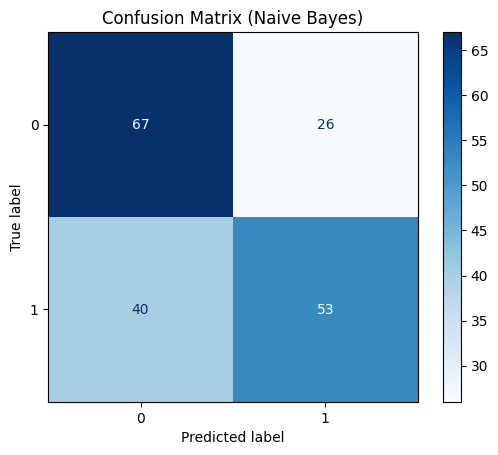


Naive Bayes AUC: 0.7427


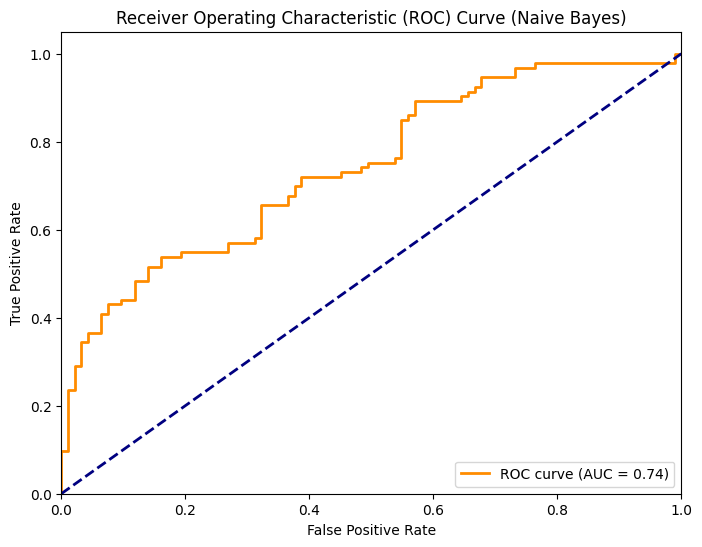


Naive Bayes model training and evaluation completed.


In [134]:
# prompt: from the same training and test as the logistic regression, create a machine learning model using Naive baiyes

import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model (Gaussian Naive Bayes is suitable for continuous features)
nb_model = GaussianNB()

# Train the model using the scaled SMOTEd training data
nb_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the Naive Bayes model
print("\nNaive Bayes Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix (Naive Bayes):")
print(cm_nb)

# Plot Confusion Matrix for Naive Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

# ROC Curve and AUC for Naive Bayes
# Get probability scores for the positive class
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
auc_nb = roc_auc_score(y_test, y_prob_nb)

print(f"\nNaive Bayes AUC: {auc_nb:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

print("\nNaive Bayes model training and evaluation completed.")


K Nearest Neighbor Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        93
           1       0.64      0.60      0.62        93

    accuracy                           0.63       186
   macro avg       0.63      0.63      0.63       186
weighted avg       0.63      0.63      0.63       186


Confusion Matrix (K Nearest Neighbor):
[[61 32]
 [37 56]]


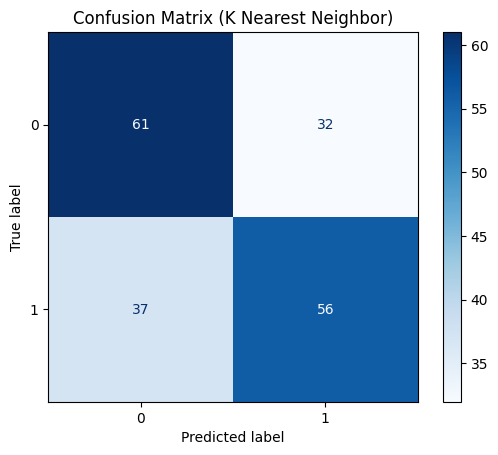


K Nearest Neighbor AUC: 0.6822


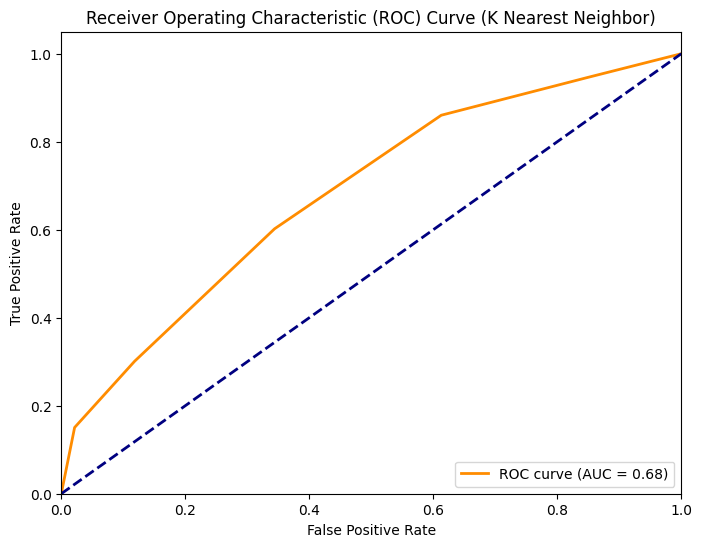


K Nearest Neighbor model training and evaluation completed.


In [135]:
# prompt:  prompt: from the same training and test as the logistic regression, create a machine learning model using K Nearest Neighbor

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K Nearest Neighbor model
# You can tune the number of neighbors (n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5) # Starting with 5 neighbors

# Train the model using the scaled SMOTEd training data
knn_model.fit(X_train_scaled, y_train_smote)

# Make predictions on the scaled testing data
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the K Nearest Neighbor model
print("\nK Nearest Neighbor Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for K Nearest Neighbor
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix (K Nearest Neighbor):")
print(cm_knn)

# Plot Confusion Matrix for K Nearest Neighbor
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (K Nearest Neighbor)')
plt.show()

# ROC Curve and AUC for K Nearest Neighbor
# Get probability scores for the positive class
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)

print(f"\nK Nearest Neighbor AUC: {auc_knn:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (K Nearest Neighbor)')
plt.legend(loc="lower right")
plt.show()

print("\nK Nearest Neighbor model training and evaluation completed.")



Starting GridSearchCV for K Nearest Neighbor...
Fitting 5 folds for each of 84 candidates, totalling 420 fits

Best parameters found by GridSearchCV for K Nearest Neighbor:
{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}

Best cross-validation score (ROC AUC) for K Nearest Neighbor:
0.7425497930362794

Evaluation of the best K Nearest Neighbor model (after tuning and using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65        93
           1       0.64      0.56      0.60        93

    accuracy                           0.62       186
   macro avg       0.63      0.62      0.62       186
weighted avg       0.63      0.62      0.62       186


Confusion Matrix (Tuned K Nearest Neighbor):
[[64 29]
 [41 52]]


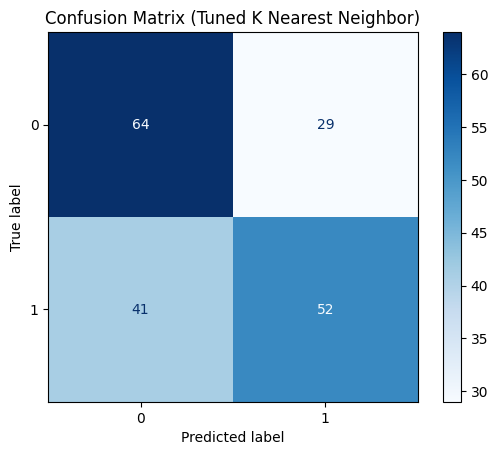


AUC (Tuned K Nearest Neighbor): 0.7220


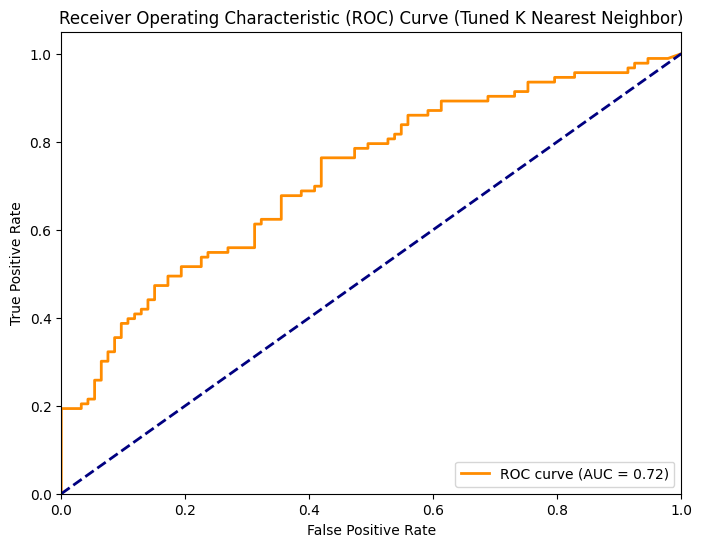


K Nearest Neighbor Hyperparameter tuning completed.


In [136]:
# prompt: From the result of K Nearest Neighbor, do hyper parameter tuning for the machine learning model for K Nearest Neighbor

import matplotlib.pyplot as plt
# --- Hyperparameter Tuning for K Nearest Neighbor using GridSearchCV ---

# Define the parameter grid for GridSearchCV for K Nearest Neighbor
# n_neighbors: Number of neighbors to use. Typically an odd number to avoid ties.
# weights: weight function used in prediction. 'uniform' means all points in the neighborhood are weighted equally. 'distance' weights points by the inverse of their distance.
# metric: distance metric to use. 'minkowski' is a common choice, and with p=2, it becomes the standard Euclidean distance.
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Explore a range of odd neighbors
    'kneighborsclassifier__weights': ['uniform', 'distance'],    # Explore weighting schemes
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'], # Explore distance metrics
    'kneighborsclassifier__p': [1, 2] # Power parameter for Minkowski metric. p=1 is Manhattan, p=2 is Euclidean. Only relevant if metric='minkowski'.
}

# Create a pipeline that includes SMOTE, Scaling, and the KNN model
# It's crucial to scale data before applying KNN, as KNN is distance-based.
# SMOTE should be inside the pipeline to prevent data leakage during cross-validation.
pipeline_knn = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE (essential for KNN)
    ('kneighborsclassifier', KNeighborsClassifier()) # KNN model
])

# Initialize GridSearchCV for K Nearest Neighbor
# cv=5 means 5-fold cross-validation
# scoring='roc_auc' is suitable for imbalanced datasets or when prioritizing ranking performance
grid_search_knn = GridSearchCV(estimator=pipeline_knn,
                               param_grid=param_grid_knn,
                               cv=5,
                               scoring='roc_auc',
                               verbose=2, # Increase verbosity to see progress
                               n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data
# The pipeline handles SMOTE and scaling internally for each fold
print("\nStarting GridSearchCV for K Nearest Neighbor...")
# Use the original X_train and y_train data here. The pipeline will handle resampling and scaling internally.
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and the best score for KNN
print("\nBest parameters found by GridSearchCV for K Nearest Neighbor:")
print(grid_search_knn.best_params_)
print("\nBest cross-validation score (ROC AUC) for K Nearest Neighbor:")
print(grid_search_knn.best_score_)

# Get the best KNN model from the grid search
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the best KNN model on the test set
# The pipeline handles scaling internally for prediction
y_pred_knn_tuned = best_knn_model.predict(X_test)
y_prob_knn_tuned = best_knn_model.predict_proba(X_test)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best K Nearest Neighbor model (after tuning and using pipeline):")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn_tuned))

# Confusion Matrix for tuned KNN model
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
print("\nConfusion Matrix (Tuned K Nearest Neighbor):")
print(cm_knn_tuned)

# Plot Confusion Matrix for tuned KNN model
disp_knn_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_knn_tuned, display_labels=best_knn_model.classes_)
disp_knn_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned K Nearest Neighbor)')
plt.show()

# ROC Curve and AUC for tuned KNN model
fpr_knn_tuned, tpr_knn_tuned, thresholds_knn_tuned = roc_curve(y_test, y_prob_knn_tuned)
auc_knn_tuned = roc_auc_score(y_test, y_prob_knn_tuned)

print(f"\nAUC (Tuned K Nearest Neighbor): {auc_knn_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_tuned, tpr_knn_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_knn_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned K Nearest Neighbor)')
plt.legend(loc="lower right")
plt.show()

print("\nK Nearest Neighbor Hyperparameter tuning completed.")


In [137]:
# prompt: Summarize all model score

import pandas as pd
# Store evaluation results for each model
model_scores = {}

# For Logistic Regression
report_lr = classification_report(y_test, y_pred, output_dict=True)
auc_lr = roc_auc_score(y_test, y_prob)
model_scores['Logistic Regression (Untuned)'] = {
    'Accuracy': report_lr['accuracy'],
    'Precision (Class 1)': report_lr['1']['precision'],
    'Recall (Class 1)': report_lr['1']['recall'],
    'F1-Score (Class 1)': report_lr['1']['f1-score'],
    'AUC': auc_lr
}

# For Tuned Logistic Regression
report_lr_tuned = classification_report(y_test, y_pred_tuned, output_dict=True)
auc_lr_tuned = roc_auc_score(y_test, y_prob_tuned)
model_scores['Logistic Regression (Tuned)'] = {
    'Accuracy': report_lr_tuned['accuracy'],
    'Precision (Class 1)': report_lr_tuned['1']['precision'],
    'Recall (Class 1)': report_lr_tuned['1']['recall'],
    'F1-Score (Class 1)': report_lr_tuned['1']['f1-score'],
    'AUC': auc_lr_tuned
}

# For SVM
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
auc_svm = roc_auc_score(y_test, y_prob_svm)
model_scores['SVM (Untuned)'] = {
    'Accuracy': report_svm['accuracy'],
    'Precision (Class 1)': report_svm['1']['precision'],
    'Recall (Class 1)': report_svm['1']['recall'],
    'F1-Score (Class 1)': report_svm['1']['f1-score'],
    'AUC': auc_svm
}

# For Tuned SVM
report_svm_tuned = classification_report(y_test, y_pred_svm_tuned, output_dict=True)
auc_svm_tuned = roc_auc_score(y_test, y_prob_svm_tuned)
model_scores['SVM (Tuned)'] = {
    'Accuracy': report_svm_tuned['accuracy'],
    'Precision (Class 1)': report_svm_tuned['1']['precision'],
    'Recall (Class 1)': report_svm_tuned['1']['recall'],
    'F1-Score (Class 1)': report_svm_tuned['1']['f1-score'],
    'AUC': auc_svm_tuned
}


# For Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
auc_rf = roc_auc_score(y_test, y_prob_rf)
model_scores['Random Forest (Untuned)'] = {
    'Accuracy': report_rf['accuracy'],
    'Precision (Class 1)': report_rf['1']['precision'],
    'Recall (Class 1)': report_rf['1']['recall'],
    'F1-Score (Class 1)': report_rf['1']['f1-score'],
    'AUC': auc_rf
}

# For Tuned Random Forest
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned, output_dict=True)
auc_rf_tuned = roc_auc_score(y_test, y_prob_rf_tuned)
model_scores['Random Forest (Tuned)'] = {
    'Accuracy': report_rf_tuned['accuracy'],
    'Precision (Class 1)': report_rf_tuned['1']['precision'],
    'Recall (Class 1)': report_rf_tuned['1']['recall'],
    'F1-Score (Class 1)': report_rf_tuned['1']['f1-score'],
    'AUC': auc_rf_tuned
}

# For Decision Tree
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
# Check if AUC was calculated for Decision Tree
auc_dt = None
if 'auc_dt' in locals(): # Check if the variable exists
    auc_dt = locals()['auc_dt']
model_scores['Decision Tree'] = {
    'Accuracy': report_dt['accuracy'],
    'Precision (Class 1)': report_dt['1']['precision'],
    'Recall (Class 1)': report_dt['1']['recall'],
    'F1-Score (Class 1)': report_dt['1']['f1-score'],
    'AUC': auc_dt # Use None if not calculated
}


# For Naive Bayes
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
auc_nb = roc_auc_score(y_test, y_prob_nb)
model_scores['Naive Bayes'] = {
    'Accuracy': report_nb['accuracy'],
    'Precision (Class 1)': report_nb['1']['precision'],
    'Recall (Class 1)': report_nb['1']['recall'],
    'F1-Score (Class 1)': report_nb['1']['f1-score'],
    'AUC': auc_nb
}


# For KNN
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
auc_knn = roc_auc_score(y_test, y_prob_knn)
model_scores['KNN (Untuned)'] = {
    'Accuracy': report_knn['accuracy'],
    'Precision (Class 1)': report_knn['1']['precision'],
    'Recall (Class 1)': report_knn['1']['recall'],
    'F1-Score (Class 1)': report_knn['1']['f1-score'],
    'AUC': auc_knn
}

# For Tuned KNN
report_knn_tuned = classification_report(y_test, y_pred_knn_tuned, output_dict=True)
auc_knn_tuned = roc_auc_score(y_test, y_prob_knn_tuned)
model_scores['KNN (Tuned)'] = {
    'Accuracy': report_knn_tuned['accuracy'],
    'Precision (Class 1)': report_knn_tuned['1']['precision'],
    'Recall (Class 1)': report_knn_tuned['1']['recall'],
    'F1-Score (Class 1)': report_knn_tuned['1']['f1-score'],
    'AUC': auc_knn_tuned
}


# Convert the dictionary to a pandas DataFrame for easy viewing
model_scores_df = pd.DataFrame.from_dict(model_scores, orient='index')

# Display the summary table
print("\n--- Model Performance Summary ---")
model_scores_df


--- Model Performance Summary ---


Accuracy  Precision (Class 1)  \
Logistic Regression (Untuned)  0.655914             0.683544   
Logistic Regression (Tuned)    0.655914             0.683544   
SVM (Untuned)                  0.645161             0.662651   
SVM (Tuned)                    0.655914             0.698630   
Random Forest (Untuned)        0.639785             0.654762   
Random Forest (Tuned)          0.634409             0.643678   
Decision Tree                  0.661290             0.663043   
Naive Bayes                    0.645161             0.670886   
KNN (Untuned)                  0.629032             0.636364   
KNN (Tuned)                    0.623656             0.641975   

                               Recall (Class 1)  F1-Score (Class 1)       AUC  
Logistic Regression (Untuned)          0.580645            0.627907  0.724361  
Logistic Regression (Tuned)            0.580645            0.627907  0.724708  
SVM (Untuned)                          0.591398            0.625000  0.722858  
SVM (Tuned)                            0.548387            0.614458  0.721239  
Random Forest (Untuned)                0.591398            0.621469  0.697653  
Random Forest (Tuned)                  0.602151            0.622222  0.700428  
Decision Tree                          0.655914            0.659459       NaN  
Naive Bayes                            0.569892            0.616279  0.742745  
KNN (Untuned)                          0.602151            0.618785  0.682160  
KNN (Tuned)                            0.559140            0.597701  0.722049

DATA UNDERSTANDING

In [138]:
# Buat tabel distribusi deskriptif terpisah berdasarkan HiringDecision
distribution_table =df.groupby('HiringDecision')[[
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany'
]].describe().transpose()
print("Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)")
distribution_table


Tabel Statistik Deskriptif Hiring Decision (1= diterima, 0=ditolak)


HiringDecision                       0           1
Age                 count  1035.000000  465.000000
                    mean     35.137198   35.174194
                    std       9.267177    9.230395
                    min      20.000000   20.000000
                    25%      27.000000   27.000000
                    50%      36.000000   35.000000
                    75%      43.000000   44.000000
                    max      50.000000   50.000000
ExperienceYears     count  1035.000000  465.000000
                    mean      7.313043    8.541935
                    std       4.721302    4.344892
                    min       0.000000    0.000000
                    25%       3.000000    6.000000
                    50%       7.000000    9.000000
                    75%      11.500000   12.000000
                    max      15.000000   15.000000
InterviewScore      count  1035.000000  465.000000
                    mean     47.762319   56.800000
                    std      27.513765   30.065245
                    min       0.000000    0.000000
                    25%      24.000000   31.000000
                    50%      48.000000   62.000000
                    75%      70.000000   83.000000
                    max     100.000000  100.000000
SkillScore          count  1035.000000  465.000000
                    mean     47.110145   60.032258
                    std      29.288227   27.505662
                    min       0.000000    0.000000
                    25%      22.000000   39.000000
                    50%      46.000000   65.000000
                    75%      73.000000   83.000000
                    max     100.000000  100.000000
PersonalityScore    count  1035.000000  465.000000
                    mean     46.059903   56.793548
                    std      28.582168   29.721124
                    min       0.000000    0.000000
                    25%      21.000000   30.000000
                    50%      45.000000   63.000000
                    75%      69.000000   82.000000
                    max     100.000000  100.000000
DistanceFromCompany count  1035.000000  465.000000
                    mean     25.669273   25.140583
                    std      14.649616   14.390860
                    min       1.031376    1.197997
                    25%      13.090216   12.150491
                    50%      25.620088   25.405877
                    75%      38.301204   37.120569
                    max      50.973395   50.992462

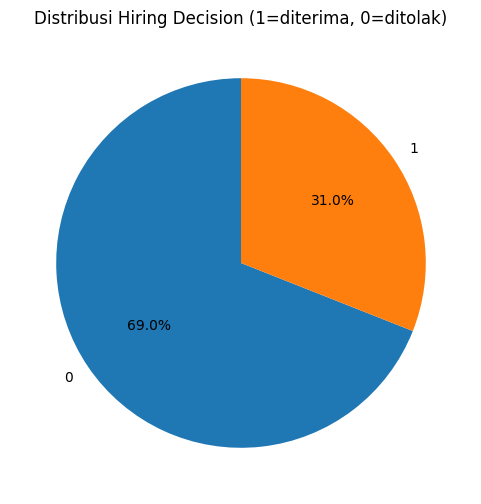

In [139]:
# prompt: make a pie chart from count

import matplotlib.pyplot as plt
# Menghitung jumlah masing-masing HiringDecision
hiring_counts = df['HiringDecision'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(hiring_counts, labels=hiring_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Hiring Decision (1=diterima, 0=ditolak)')
plt.show()

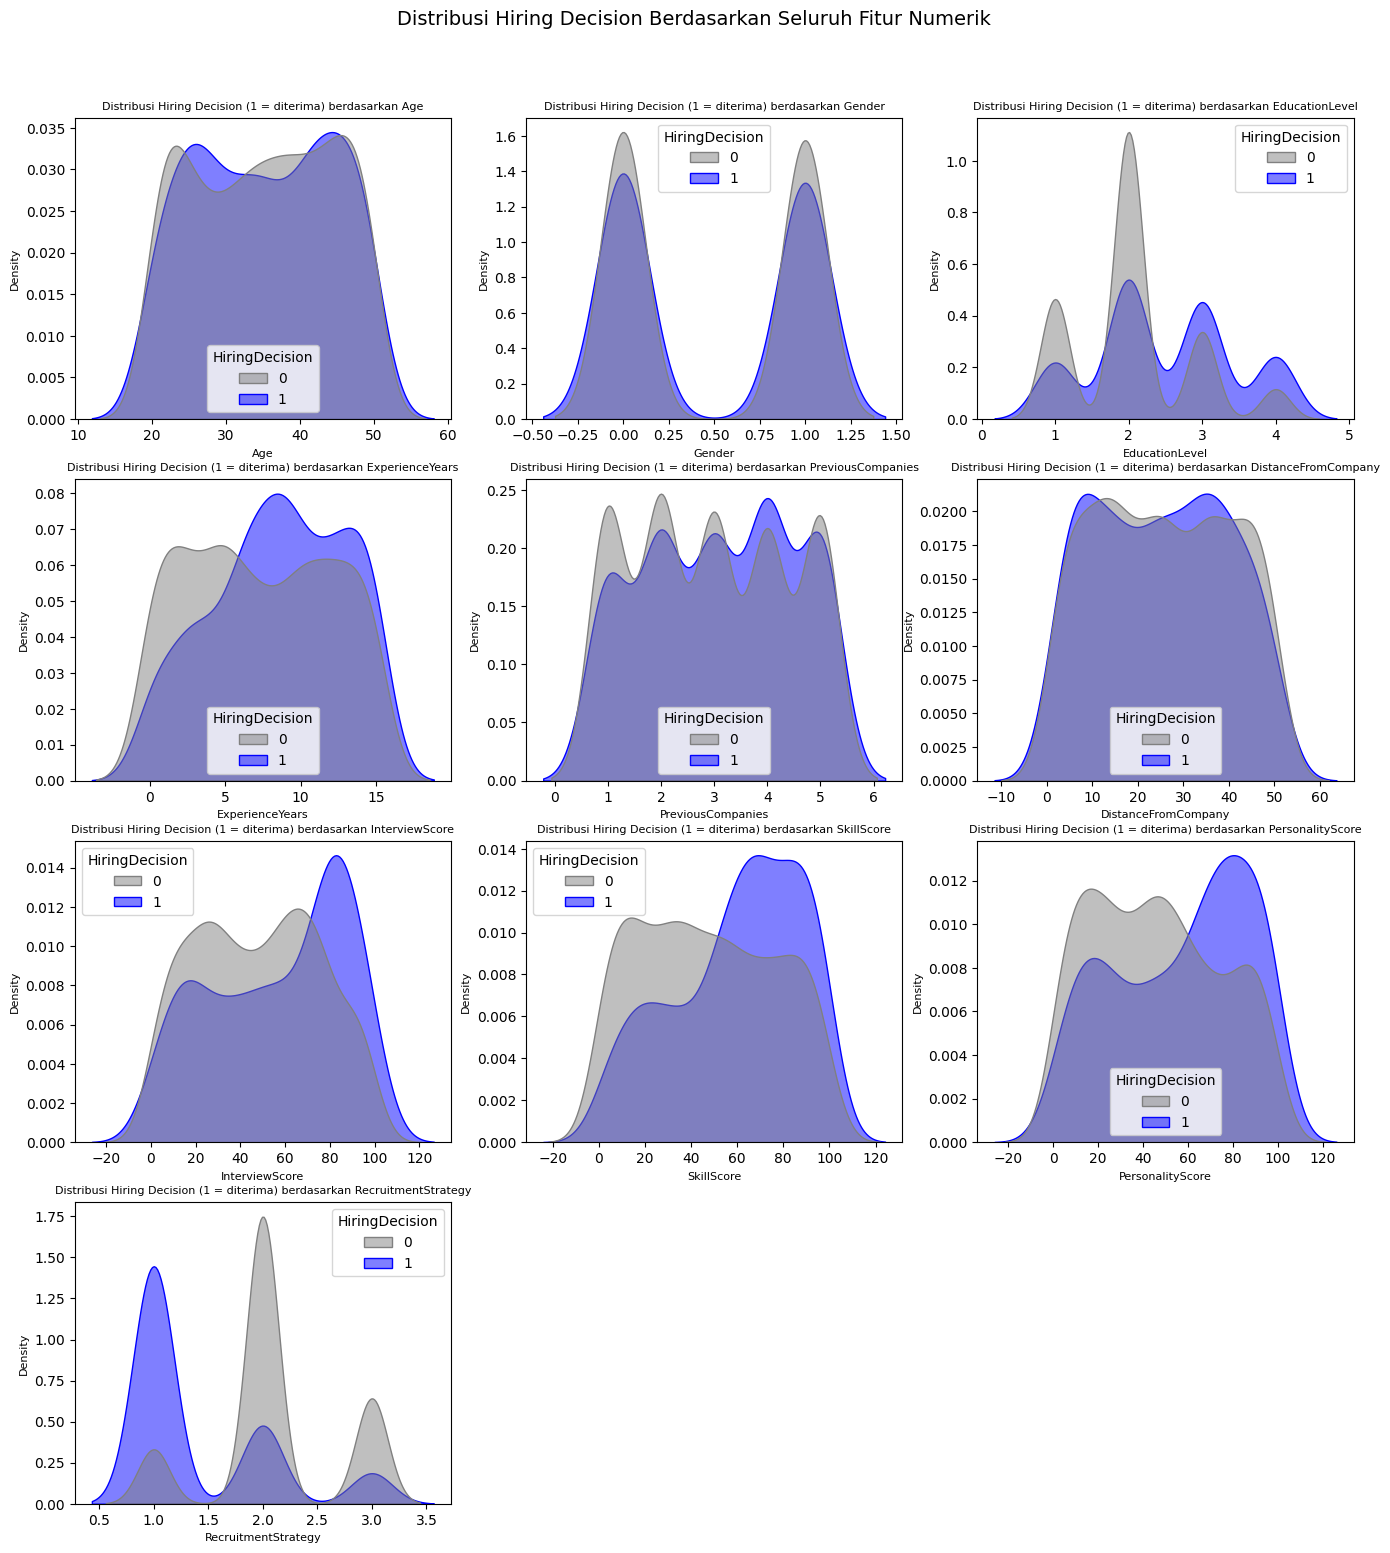

In [140]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols: # Pastikan 'HiringDecision' tidak di-plot sebagai fitur numerik
    numerical_cols.remove('HiringDecision')

if not numerical_cols:
    print("Tidak ada kolom numerik yang ditemukan untuk di-plot distribusinya.")
else:
    # Langkah 3: Menentukan ukuran grid untuk subplot secara dinamis
    num_plots = len(numerical_cols)
    num_cols = 3  # Anda bisa mengubah ini untuk mengatur berapa banyak plot per baris
    num_rows = math.ceil(num_plots / num_cols)

    # Membuat figure dan axes untuk semua subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5.5, num_rows * 4.5))
    axes = axes.flatten() # Meratakan array axes agar lebih mudah diiterasi dalam loop

    # Variabel untuk menyimpan handle dan label legend dari plot pertama
    # Ini akan digunakan untuk membuat satu legend global
    handles, labels = None, None

    custom_palette = {1: 'blue', 0: 'grey'}

    # Langkah 4: Loop melalui setiap kolom numerik dan buat plot KDE
    for i, col in enumerate(numerical_cols):
        if i < len(axes): # Memastikan kita tidak melebihi jumlah subplot yang tersedia
            sns.kdeplot(data=df, x=col, hue='HiringDecision', fill=True,
                        common_norm=False, alpha=0.5, ax=axes[i],palette=custom_palette)
            axes[i].set_title(f'Distribusi Hiring Decision (1 = diterima) berdasarkan {col}', fontsize=8)
            axes[i].set_xlabel(col, fontsize=8)
            axes[i].set_ylabel('Density', fontsize=8)
         # --- BAGIAN PENTING: Mengambil handles dan Menentukan Label Legend Kustom ---
            # Mengambil handles dan label default dari plot yang baru dibuat
            handles, default_labels = axes[i].get_legend_handles_labels()


    # Langkah 5: Hapus subplot yang kosong jika ada (jika jumlah plot tidak pas dengan grid)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Langkah 6: Tambahkan Legend Tunggal untuk Seluruh Gambar (Figure)
    if handles and labels:
        fig.legend(handles=handles, labels=labels, title='HiringDecision',
                   loc='upper right', bbox_to_anchor=(1.08, 1), # Menempatkan legend di luar area plot utama
                   fontsize=9, title_fontsize=10)

    # Langkah 7: Beri Judul Keseluruhan dan Simpan Plot
    plt.suptitle('Distribusi Hiring Decision Berdasarkan Seluruh Fitur Numerik', y=0.94, fontsize=14)

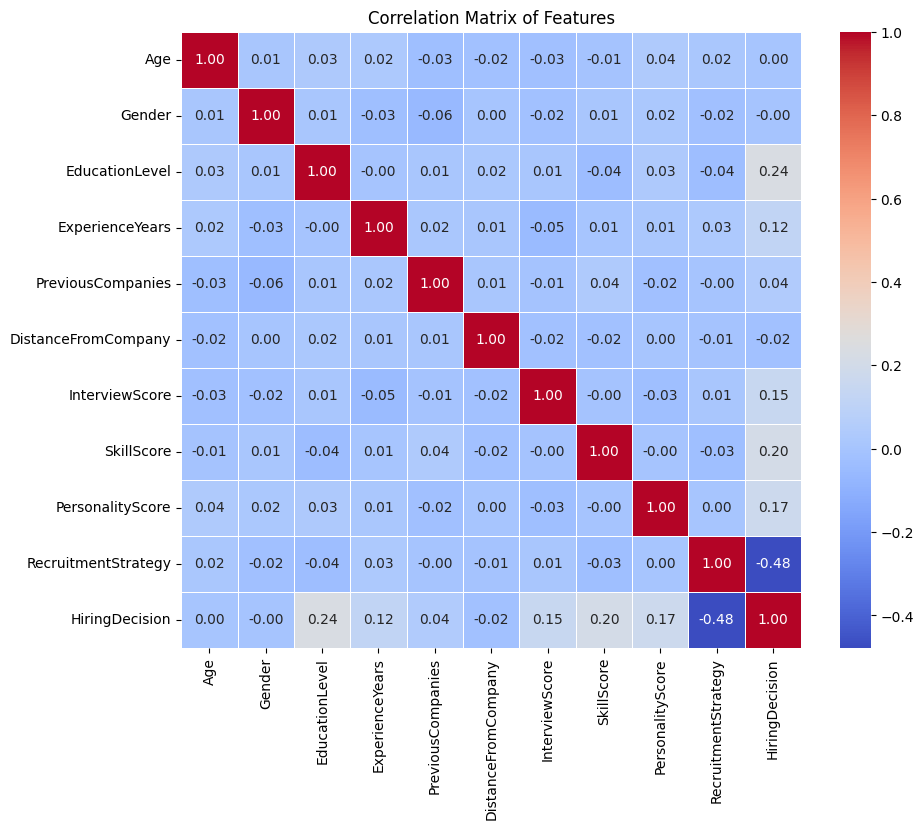

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io # Diperlukan untuk membaca data string ke pandas


# --- Langkah 2: Menghitung Matriks Korelasi ---
# Ini akan menghitung seberapa kuat hubungan antara setiap pasangan kolom numerik.
# Nilai berkisar dari -1 (korelasi negatif kuat) hingga 1 (korelasi positif kuat),
# dan 0 berarti tidak ada korelasi.
correlation_matrix = df.select_dtypes(include=['number']).corr()

# --- Langkah 3: Membuat Heatmap ---
# Heatmap adalah representasi visual dari matriks korelasi.
plt.figure(figsize=(10, 8)) # Mengatur ukuran gambar agar lebih mudah dibaca
sns.heatmap(correlation_matrix,
            annot=True,     # Menampilkan nilai korelasi pada heatmap
            cmap='coolwarm',# Mengatur skema warna (coolwarm adalah pilihan umum)
            fmt=".2f",      # Memformat nilai korelasi menjadi 2 angka desimal
            linewidths=.5)  # Menambahkan garis tipis antar sel

# --- Langkah 4: Memberi Judul dan Menyimpan Plot ---
plt.title('Correlation Matrix of Features') # Judul plot
plt.show()


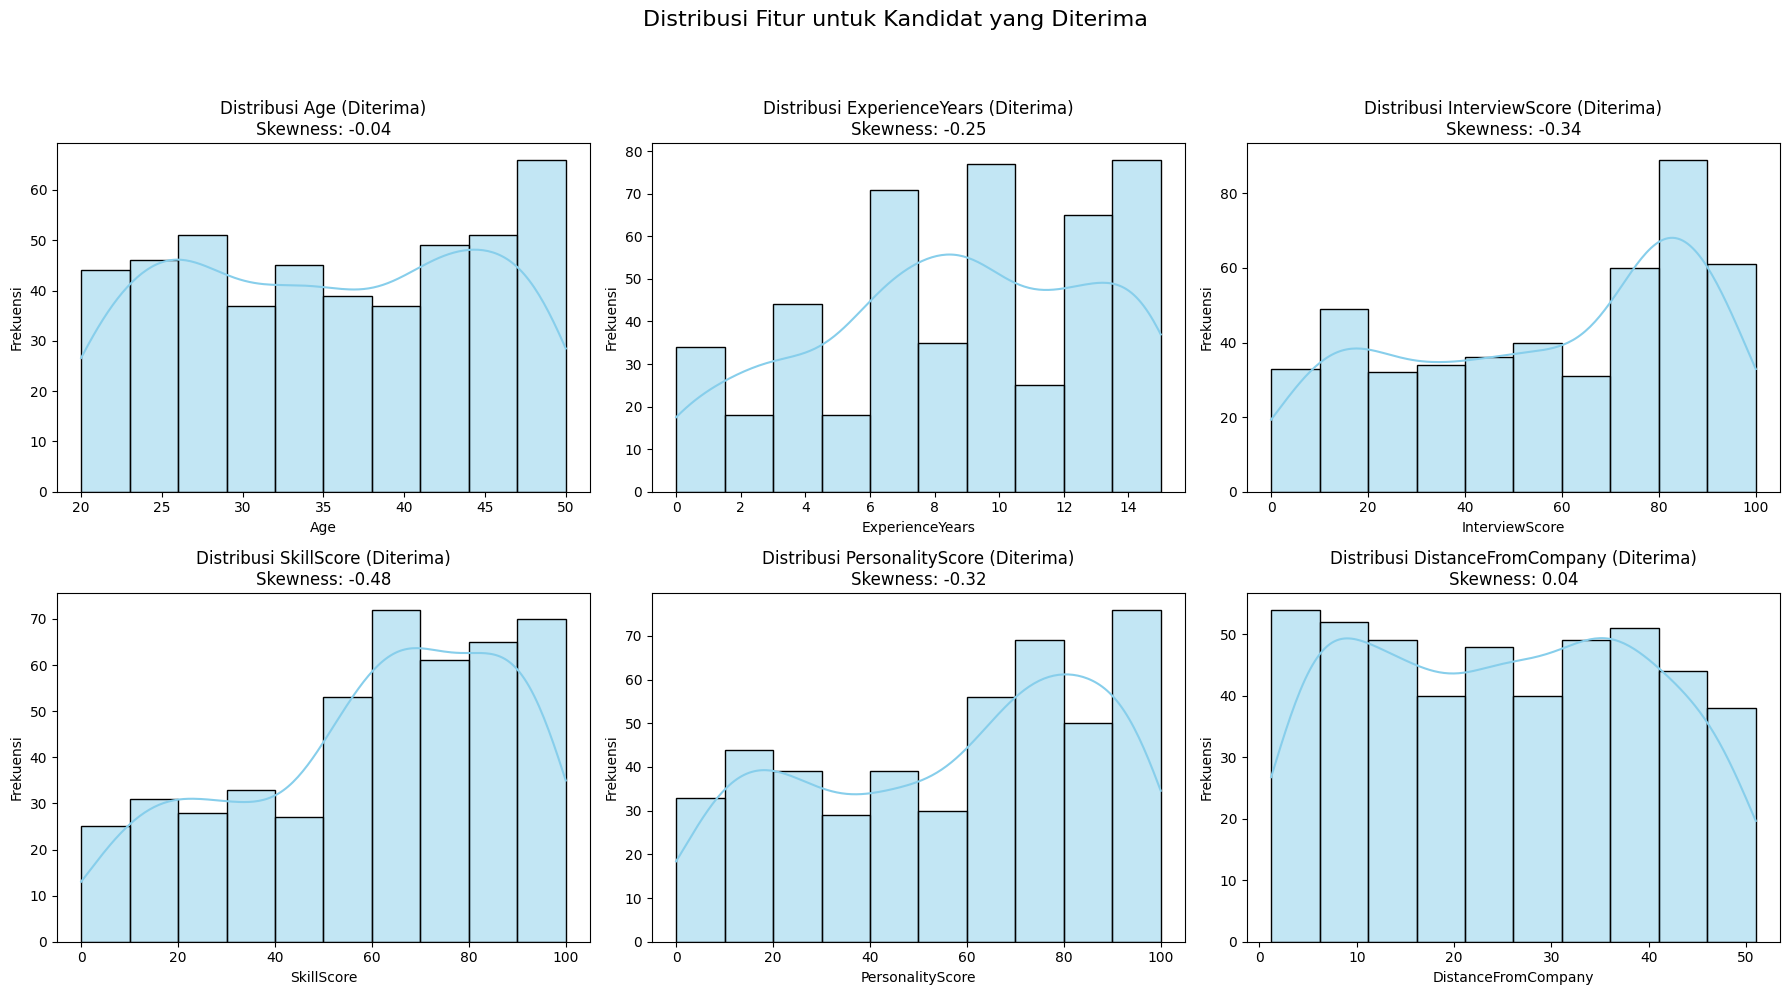

In [142]:
#Hiring decision = 1

import matplotlib.pyplot as plt
# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 1]

# Select only the numerical columns from the filtered dataframe
numerical_cols_hired = df_hired.select_dtypes(include=['number']).columns.tolist()

# Remove 'hiring_decision' from the list of columns to plot as it is the filter
if 'HiringDecision' in numerical_cols_hired:
    numerical_cols_hired.remove('HiringDecision')

## --- Langkah 3: Definisikan Kolom yang Diinginkan ---
# Daftar kolom spesifik yang Anda minta untuk di-plot
selected_columns_for_skewness_plot = [
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany','gender','education'
]

# Filter daftar kolom yang dipilih agar hanya menyertakan yang benar-benar ada di df_hired
# dan yang merupakan tipe numerik.
actual_numerical_cols_to_plot = [
    col for col in selected_columns_for_skewness_plot
    if col in df_hired.columns and pd.api.types.is_numeric_dtype(df_hired[col])
]

if not actual_numerical_cols_to_plot:
    print("Tidak ada kolom numerik yang valid dari daftar yang Anda berikan untuk di-plot dalam data yang diterima.")
else:
    # Langkah 4: Tentukan ukuran grid untuk subplot
    num_plots_hired = len(actual_numerical_cols_to_plot)
    cols_per_row_hired = 3  # Anda bisa menyesuaikan jumlah plot per baris
    rows_per_plot_hired = math.ceil(num_plots_hired / cols_per_row_hired)

    # Langkah 5: Buat subplots untuk distribusi
    fig_dist, axes_dist = plt.subplots(rows_per_plot_hired, cols_per_row_hired,
                                        figsize=(cols_per_row_hired * 6, rows_per_plot_hired * 5))
    axes_dist = axes_dist.flatten()  # Meratakan array axes untuk iterasi yang lebih mudah

    # Langkah 6: Buat plot distribusi untuk setiap kolom yang dipilih
    for i, col in enumerate(actual_numerical_cols_to_plot):
        sns.histplot(data=df_hired, x=col, kde=True, ax=axes_dist[i], color='skyblue') # Warna default untuk plot
        # Hitung skewness
        skewness_val = df_hired[col].skew()
        axes_dist[i].set_title(f'Distribusi {col} (Diterima)\nSkewness: {skewness_val:.2f}', fontsize=12)
        axes_dist[i].set_xlabel(col, fontsize=10)
        axes_dist[i].set_ylabel('Frekuensi', fontsize=10)

    # Langkah 7: Sembunyikan subplot yang tidak digunakan
    for j in range(i + 1, len(axes_dist)):
        fig_dist.delaxes(axes_dist[j])

    # Langkah 8: Sesuaikan tata letak dan tampilkan/simpan plot
    plt.suptitle('Distribusi Fitur untuk Kandidat yang Diterima', y=1.02, fontsize=16) # Judul utama
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Menyesuaikan tata letak agar tidak tumpang tindih

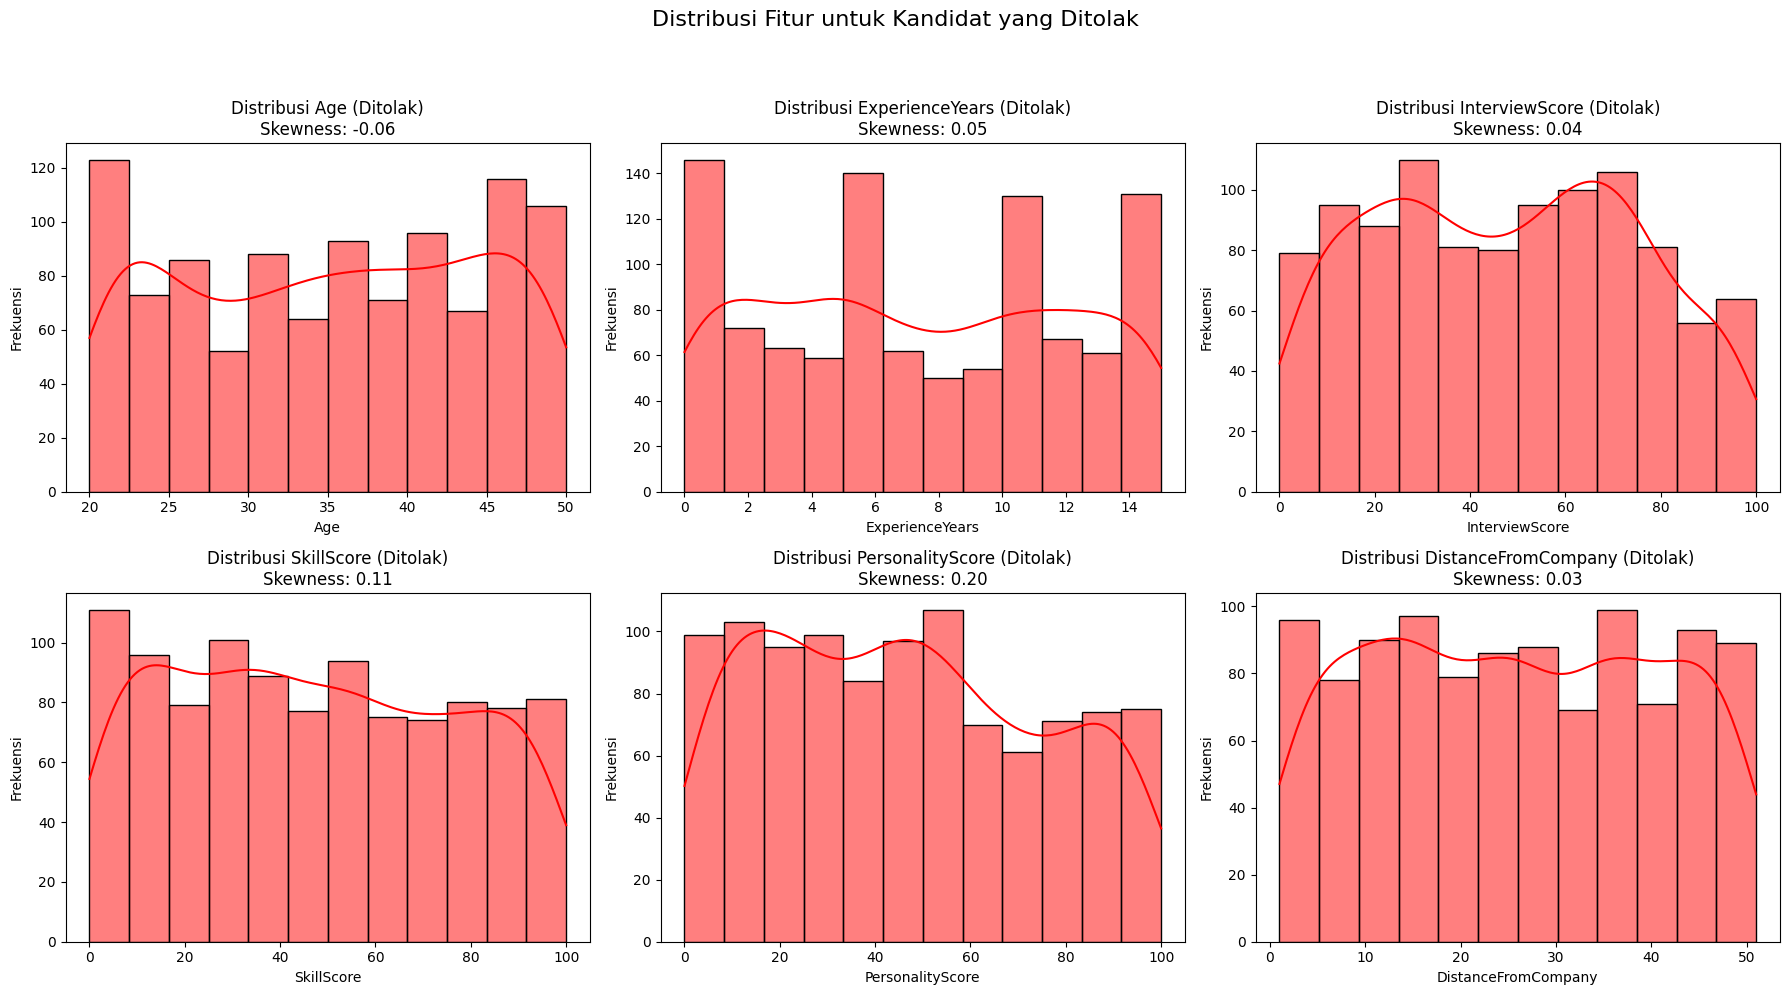

In [143]:
#Hiring decision = 0

import matplotlib.pyplot as plt
# Filter the dataframe for hiring decision = 1
df_hired = df[df['HiringDecision'] == 0]

# Select only the numerical columns from the filtered dataframe
numerical_cols_hired = df_hired.select_dtypes(include=['number']).columns.tolist()

# Remove 'hiring_decision' from the list of columns to plot as it is the filter
if 'HiringDecision' in numerical_cols_hired:
    numerical_cols_hired.remove('HiringDecision')

## --- Langkah 3: Definisikan Kolom yang Diinginkan ---
# Daftar kolom spesifik yang Anda minta untuk di-plot
selected_columns_for_skewness_plot = [
    'Age', 'ExperienceYears', 'InterviewScore', 'SkillScore',
    'PersonalityScore', 'DistanceFromCompany','gender','education'
]

# Filter daftar kolom yang dipilih agar hanya menyertakan yang benar-benar ada di df_hired
# dan yang merupakan tipe numerik.
actual_numerical_cols_to_plot = [
    col for col in selected_columns_for_skewness_plot
    if col in df_hired.columns and pd.api.types.is_numeric_dtype(df_hired[col])
]

if not actual_numerical_cols_to_plot:
    print("Tidak ada kolom numerik yang valid dari daftar yang Anda berikan untuk di-plot dalam data yang diterima.")
else:
    # Langkah 4: Tentukan ukuran grid untuk subplot
    num_plots_hired = len(actual_numerical_cols_to_plot)
    cols_per_row_hired = 3  # Anda bisa menyesuaikan jumlah plot per baris
    rows_per_plot_hired = math.ceil(num_plots_hired / cols_per_row_hired)

    # Langkah 5: Buat subplots untuk distribusi
    fig_dist, axes_dist = plt.subplots(rows_per_plot_hired, cols_per_row_hired,
                                        figsize=(cols_per_row_hired * 6, rows_per_plot_hired * 5))
    axes_dist = axes_dist.flatten()  # Meratakan array axes untuk iterasi yang lebih mudah

    # Langkah 6: Buat plot distribusi untuk setiap kolom yang dipilih
    for i, col in enumerate(actual_numerical_cols_to_plot):
        sns.histplot(data=df_hired, x=col, kde=True, ax=axes_dist[i], color='red') # Warna default untuk plot
        # Hitung skewness
        skewness_val = df_hired[col].skew()
        axes_dist[i].set_title(f'Distribusi {col} (Ditolak)\nSkewness: {skewness_val:.2f}', fontsize=12)
        axes_dist[i].set_xlabel(col, fontsize=10)
        axes_dist[i].set_ylabel('Frekuensi', fontsize=10)

    # Langkah 7: Sembunyikan subplot yang tidak digunakan
    for j in range(i + 1, len(axes_dist)):
        fig_dist.delaxes(axes_dist[j])

    # Langkah 8: Sesuaikan tata letak dan tampilkan/simpan plot
    plt.suptitle('Distribusi Fitur untuk Kandidat yang Ditolak', y=1.02, fontsize=16) # Judul utama
    plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Menyesuaikan tata letak agar tidak tumpang tindih

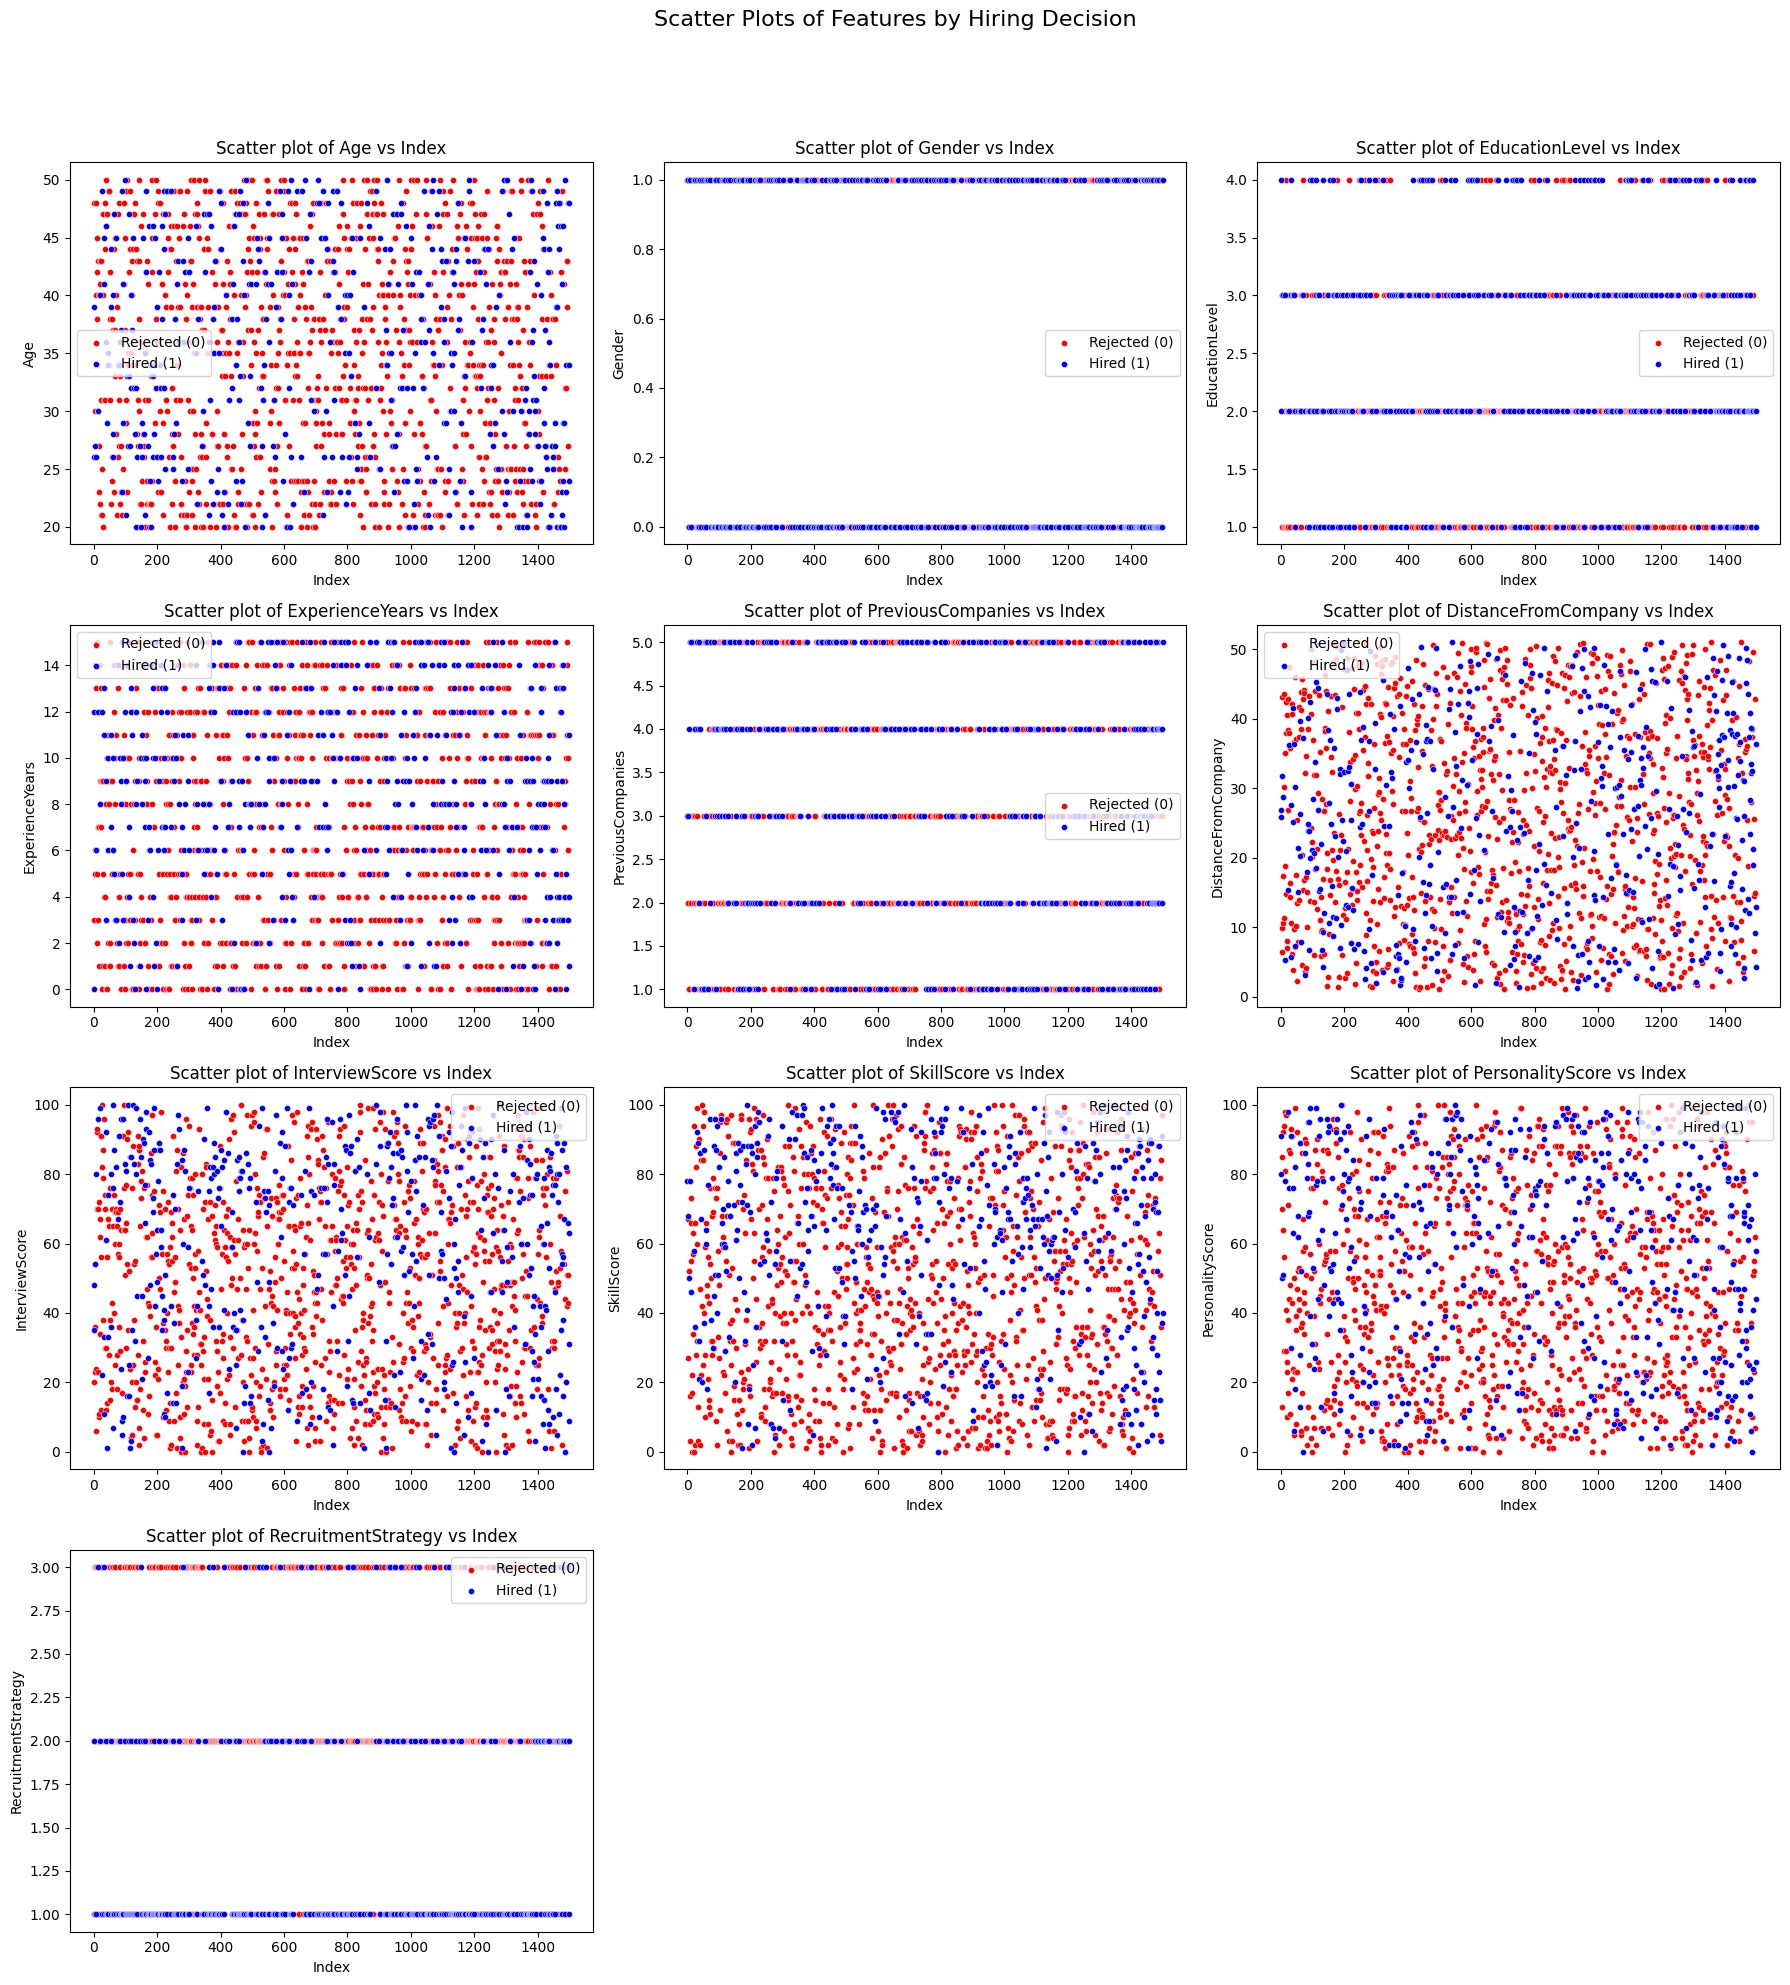

In [144]:
#Scatter plot persebaran hiring

import matplotlib.pyplot as plt
# Identify numerical columns excluding the target variable 'HiringDecision'
numerical_cols_for_scatter = df.select_dtypes(include=['number']).columns.tolist()
if 'HiringDecision' in numerical_cols_for_scatter:
    numerical_cols_for_scatter.remove('HiringDecision')

# Determine the number of columns to plot
num_scatter_plots = len(numerical_cols_for_scatter)

# Calculate grid size for subplots
cols_per_row_scatter = 3 # You can adjust this number
rows_per_plot_scatter = math.ceil(num_scatter_plots / cols_per_row_scatter)

# Create subplots for scatter plots
fig_scatter, axes_scatter = plt.subplots(rows_per_plot_scatter, cols_per_row_scatter,
                                          figsize=(cols_per_row_scatter * 6, rows_per_plot_scatter * 5))
axes_scatter = axes_scatter.flatten() # Flatten the array of axes

# Create scatter plots for each numerical column against its index (or just plotted)
for i, col in enumerate(numerical_cols_for_scatter):
    # Scatter plot for HiringDecision = 0 (Red)
    sns.scatterplot(data=df[df['HiringDecision'] == 0], x=df[df['HiringDecision'] == 0].index, y=col, ax=axes_scatter[i], color='red', label='Rejected (0)', s=20)

    # Scatter plot for HiringDecision = 1 (Blue)
    sns.scatterplot(data=df[df['HiringDecision'] == 1], x=df[df['HiringDecision'] == 1].index, y=col, ax=axes_scatter[i], color='blue', label='Hired (1)', s=20)

    axes_scatter[i].set_title(f'Scatter plot of {col} vs Index', fontsize=12)
    axes_scatter[i].set_xlabel('Index', fontsize=10)
    axes_scatter[i].set_ylabel(col, fontsize=10)
    axes_scatter[i].legend() # Add legend to show color mapping

# Hide any unused subplots
for j in range(i + 1, len(axes_scatter)):
    fig_scatter.delaxes(axes_scatter[j])

# Adjust layout and display plot
plt.suptitle('Scatter Plots of Features by Hiring Decision', y=1.02, fontsize=16) # Main title
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent overlap
plt.show()

**DATA MODELLING MAIN**

In [149]:
# prompt: Split main dataframe data 0.8 for training and 0.2 for test with the column Skillscore, ExperienceYears, EducationLevel, InterviewScore, PersonalityScore, PreviousCompanies for machine learning. after that, smote the training set and scale it

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
features = ['SkillScore', 'ExperienceYears', 'EducationLevel', 'InterviewScore', 'PersonalityScore', 'PreviousCompanies']
X_main = df[features] # Use the original dataframe before any balancing attempts
y_main = df['HiringDecision']

# Split the data into training and testing sets
# CHANGE: Use y_main for the stratify parameter
X_train_main, X_test_main, y_train_main, y_test_main = train_test_split(X_main, y_main, test_size=0.2, random_state=42, stratify=y_main) # Use stratify to maintain the class distribution

print("Original training set shape:", X_train_main.shape, y_train_main.shape)
print("Original testing set shape:", X_test_main.shape, y_test_main.shape)
print("Original training set distribution:\n", y_train_main.value_counts())
print("Original testing set distribution:\n", y_test_main.value_counts())

# Apply SMOTE to the training set ONLY
# Ensure you only apply SMOTE to the training data to avoid data leakage
smote = SMOTE(random_state=42)
X_train_smote_main, y_train_smote_main = smote.fit_resample(X_train_main, y_train_main)

print("\nTraining set shape after SMOTE:", X_train_smote_main.shape, y_train_smote_main.shape)
print("Training set distribution after SMOTE:\n", y_train_smote_main.value_counts())

# Scale the SMOTEd training data and the original test data
scaler = StandardScaler()

# Fit the scaler on the SMOTEd training data and transform it
X_train_scaled_main = scaler.fit_transform(X_train_smote_main)

# Transform the test data using the scaler fitted on the training data
X_test_scaled_main = scaler.transform(X_test_main)

# Convert the scaled arrays back to DataFrames (optional, but can be helpful)
X_train_scaled_main = pd.DataFrame(X_train_scaled_main, columns=features)
X_test_scaled_main = pd.DataFrame(X_test_scaled_main, columns=features)

print("\nScaled training data head:")
print(X_train_scaled_main.head())
print("\nScaled testing data head:")
print(X_test_scaled_main.head())

print("\nData splitting, SMOTE, and scaling completed.")

Original training set shape: (1200, 6) (1200,)
Original testing set shape: (300, 6) (300,)
Original training set distribution:
 HiringDecision
0    828
1    372
Name: count, dtype: int64
Original testing set distribution:
 HiringDecision
0    207
1     93
Name: count, dtype: int64

Training set shape after SMOTE: (1656, 6) (1656,)
Training set distribution after SMOTE:
 HiringDecision
1    828
0    828
Name: count, dtype: int64

Scaled training data head:
   SkillScore  ExperienceYears  EducationLevel  InterviewScore  \
0    1.191538         0.919013        1.006984       -0.249386   
1    0.738605        -1.341661        1.006984        1.548747   
2   -1.317017         1.371148       -1.388943        0.130989   
3   -0.655037        -1.793795       -0.190980       -0.629760   
4   -1.003447        -1.115593       -0.190980       -1.148452   

   PersonalityScore  PreviousCompanies  
0          0.839952          -0.691201  
1          1.551181          -0.691201  
2         -0.277693 

Logistic Regression Model Evaluation on Main Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       207
           1       0.48      0.60      0.54        93

    accuracy                           0.68       300
   macro avg       0.64      0.66      0.64       300
weighted avg       0.70      0.68      0.68       300


Confusion Matrix:
[[147  60]
 [ 37  56]]


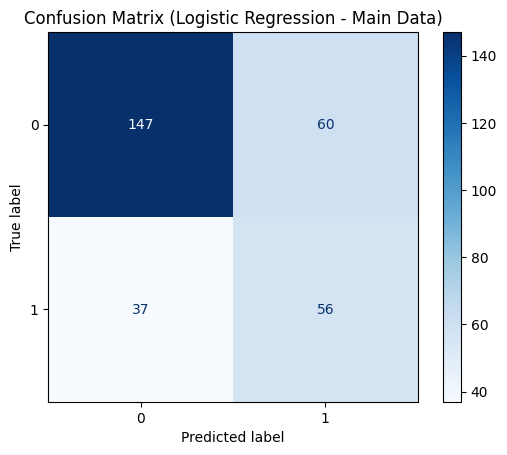


AUC: 0.7125


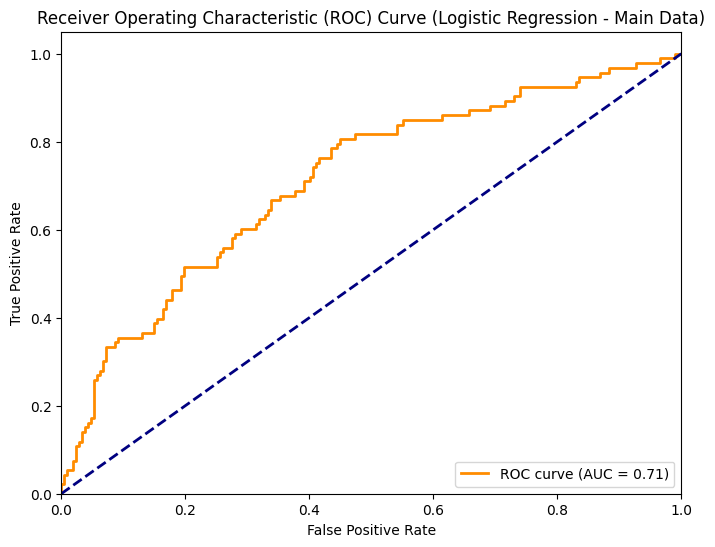


Logistic Regression model training and evaluation on main data completed.


In [150]:
# prompt: Create a machine learning model using logistic regression using main data training and main data set (not df_balanced)

import matplotlib.pyplot as plt
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model using the scaled SMOTEd training data (as prepared in the preceding code)
log_reg.fit(X_train_scaled_main, y_train_smote_main)

# Make predictions on the scaled testing data (as prepared in the preceding code)
y_pred_RM = log_reg.predict(X_test_scaled_main)

# Evaluate the model
print("Logistic Regression Model Evaluation on Main Data:")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_RM))

# Confusion Matrix
cm = confusion_matrix(y_test_main, y_pred_RM)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression - Main Data)')
plt.show()

# ROC Curve and AUC
y_prob = log_reg.predict_proba(X_test_scaled_main)[:, 1] # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test_main, y_prob)
auc = roc_auc_score(y_test_main, y_prob)

print(f"\nAUC: {auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nLogistic Regression model training and evaluation on main data completed.")


Starting GridSearchCV for Logistic Regression on Main Data...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters found by GridSearchCV for Logistic Regression (Main Data):
{'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}

Best cross-validation score (ROC AUC) for Logistic Regression (Main Data):
0.7437524472994352

Evaluation of the best Tuned Logistic Regression model (Main Data - using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       207
           1       0.48      0.60      0.54        93

    accuracy                           0.68       300
   macro avg       0.64      0.66      0.64       300
weighted avg       0.70      0.68      0.68       300


Confusion Matrix (Tuned Logistic Regression - Main Data):
[[147  60]
 [ 37  56]]


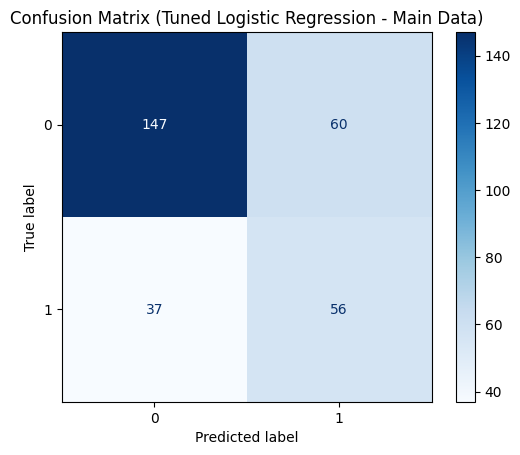


AUC (Tuned Logistic Regression - Main Data): 0.7125


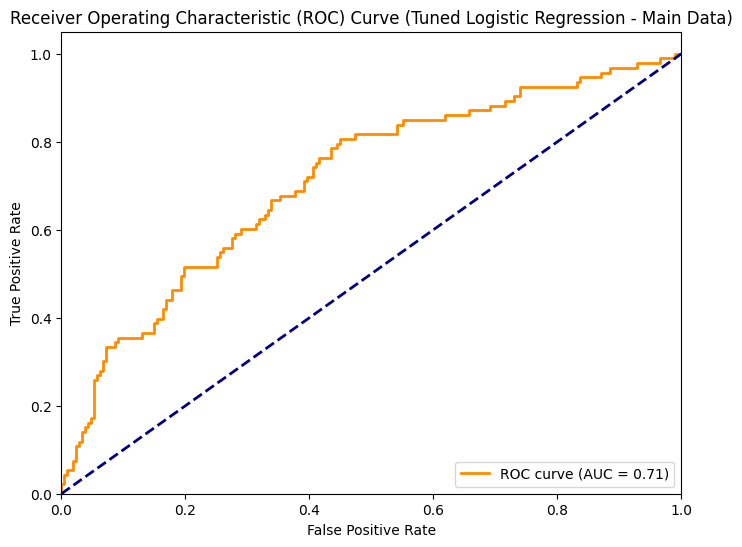


Logistic Regression Hyperparameter tuning on main data completed.


In [151]:
# --- Optional: Hyperparameter Tuning with GridSearchCV on Main Data using Pipeline ---
# This section is similar to the tuning done for the balanced dataset, but now uses the original df data
# and incorporates the SMOTE step correctly within the cross-validation pipeline.

print("\nStarting GridSearchCV for Logistic Regression on Main Data...")

# Define the parameter grid
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

# Create a pipeline that includes SMOTE, Scaling, and Logistic Regression
# Use ImbPipeline to correctly handle SMOTE within cross-validation
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE
    ('logisticregression', LogisticRegression(random_state=42)) # The model to tune
])

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='roc_auc', # Use ROC AUC due to potential imbalance
                           verbose=2, # Increase verbosity
                           n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data (from df)
# The pipeline handles SMOTE and scaling internally for each fold
grid_search.fit(X_train_main, y_train_main) # Use the X_train, y_train derived from the original 'df'

# Get the best parameters and the best score
print("\nBest parameters found by GridSearchCV for Logistic Regression (Main Data):")
print(grid_search.best_params_)
print("\nBest cross-validation score (ROC AUC) for Logistic Regression (Main Data):")
print(grid_search.best_score_)

# Get the best model from the grid search
best_log_reg_model_tuned = grid_search.best_estimator_

# Evaluate the best tuned model on the test set
# The pipeline handles scaling internally for prediction
y_pred_tuned = best_log_reg_model_tuned.predict(X_test_main) # Use the original X_test derived from 'df'
y_prob_tuned = best_log_reg_model_tuned.predict_proba(X_test_main)[:, 1]

print("\nEvaluation of the best Tuned Logistic Regression model (Main Data - using pipeline):")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_tuned))

# Confusion Matrix for tuned model
cm_tuned = confusion_matrix(y_test_main, y_pred_tuned)
print("\nConfusion Matrix (Tuned Logistic Regression - Main Data):")
print(cm_tuned)

# Plot Confusion Matrix for tuned model
disp_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=best_log_reg_model_tuned.classes_)
disp_tuned.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Logistic Regression - Main Data)')
plt.show()

# ROC Curve and AUC for tuned model
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test_main, y_prob_tuned)
auc_tuned = roc_auc_score(y_test_main, y_prob_tuned)

print(f"\nAUC (Tuned Logistic Regression - Main Data): {auc_tuned:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned, tpr_tuned, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned Logistic Regression - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nLogistic Regression Hyperparameter tuning on main data completed.")


SVM Model Evaluation on Main Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       207
           1       0.48      0.62      0.54        93

    accuracy                           0.68       300
   macro avg       0.64      0.66      0.65       300
weighted avg       0.71      0.68      0.69       300


Confusion Matrix (SVM - Main Data):
[[145  62]
 [ 35  58]]


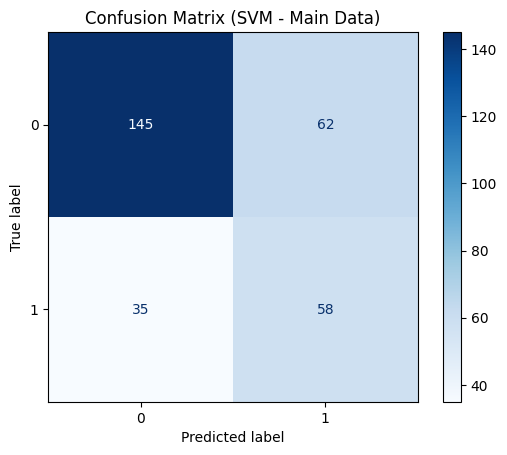


SVM AUC (Main Data): 0.7073


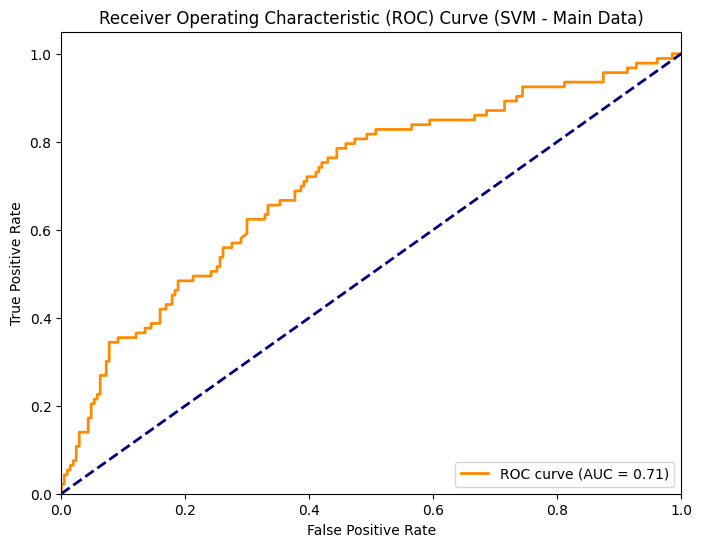


SVM model training and evaluation on main data completed.

Starting GridSearchCV for SVM on Main Data...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found by GridSearchCV for SVM (Main Data):
{'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

Best cross-validation score (ROC AUC) for SVM (Main Data):
0.741224530554651

Evaluation of the best Tuned SVM model (Main Data - using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       207
           1       0.47      0.62      0.54        93

    accuracy                           0.67       300
   macro avg       0.64      0.65      0.64       300
weighted avg       0.70      0.67      0.68       300


Confusion Matrix (Tuned SVM - Main Data):
[[142  65]
 [ 35  58]]


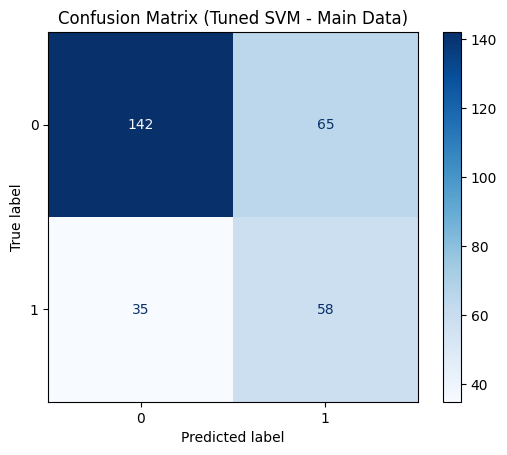


AUC (Tuned SVM - Main Data): 0.7084


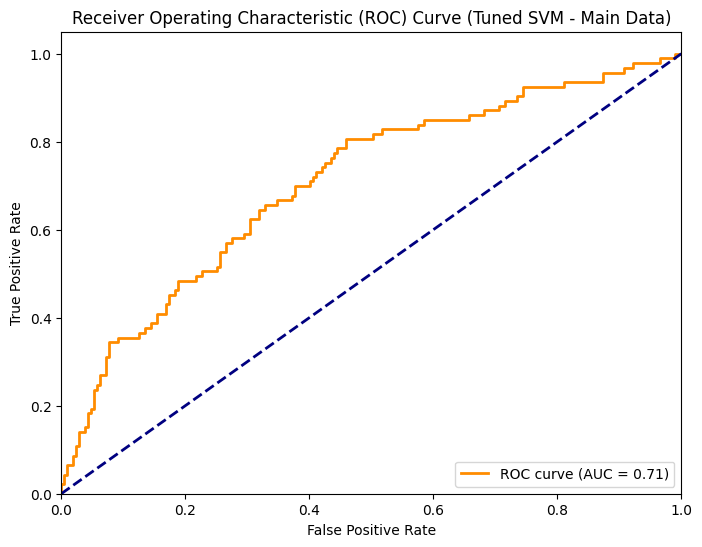


SVM Hyperparameter tuning on main data completed.


In [153]:
# prompt: from the same training and test as the logistic regression (main dataframe), create a machine learning model using SVM

import matplotlib.pyplot as plt
# --- SVM Model Training and Evaluation on Main Data ---
from sklearn.svm import SVC # Import SVC for SVM model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay # Import necessary metrics

# Initialize the SVM model
# Using the same scaled SMOTEd data as the Logistic Regression model
svm_model_main = SVC(kernel='linear', random_state=42, probability=True) # probability=True allows predict_proba

# Train the model using the scaled SMOTEd training data (from the main dataframe split)
svm_model_main.fit(X_train_scaled_main, y_train_smote_main)

# Make predictions on the scaled testing data (from the main dataframe split)
y_pred_svm_main = svm_model_main.predict(X_test_scaled_main)

# Evaluate the SVM model
print("\nSVM Model Evaluation on Main Data:")
print("Classification Report:")
# CHANGE: Use y_test_main instead of y_test
print(classification_report(y_test_main, y_pred_svm_main))

# Confusion Matrix for SVM
# CHANGE: Use y_test_main instead of y_test
cm_svm_main = confusion_matrix(y_test_main, y_pred_svm_main)
print("\nConfusion Matrix (SVM - Main Data):")
print(cm_svm_main)

# Plot Confusion Matrix for SVM
disp_svm_main = ConfusionMatrixDisplay(confusion_matrix=cm_svm_main, display_labels=svm_model_main.classes_)
disp_svm_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (SVM - Main Data)')
plt.show()

# ROC Curve and AUC for SVM
# Get probability scores for the positive class
y_prob_svm_main = svm_model_main.predict_proba(X_test_scaled_main)[:, 1]
# CHANGE: Use y_test_main instead of y_test
fpr_svm_main, tpr_svm_main, thresholds_svm_main = roc_curve(y_test_main, y_prob_svm_main)
# CHANGE: Use y_test_main instead of y_test
auc_svm_main = roc_auc_score(y_test_main, y_prob_svm_main)

print(f"\nSVM AUC (Main Data): {auc_svm_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_main, tpr_svm_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (SVM - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nSVM model training and evaluation on main data completed.")

# --- Hyperparameter Tuning for SVM on Main Data using Pipeline ---
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline # Import ImbPipeline
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from imblearn.over_sampling import SMOTE # Import SMOTE


print("\nStarting GridSearchCV for SVM on Main Data...")

# Define the parameter grid for GridSearchCV for SVM
param_grid_svm_main = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto', 0.1, 1]
}

# Create a pipeline that includes SMOTE, Scaling, and the SVM model
pipeline_svm_main = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE
    ('svc', SVC(random_state=42, probability=True)) # SVM model (probability=True needed for ROC AUC)
])

# Initialize GridSearchCV for SVM
grid_search_svm_main = GridSearchCV(estimator=pipeline_svm_main,
                                    param_grid=param_grid_svm_main,
                                    cv=5,
                                    scoring='roc_auc',
                                    verbose=2, # Increase verbosity to see progress
                                    n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data (from df)
# The pipeline handles SMOTE and scaling internally for each fold
# CHANGE: Use X_train_main, y_train_main instead of X_train, y_train
grid_search_svm_main.fit(X_train_main, y_train_main) # Use the original X_train, y_train derived from 'df'

# Get the best parameters and the best score for SVM
print("\nBest parameters found by GridSearchCV for SVM (Main Data):")
print(grid_search_svm_main.best_params_)
print("\nBest cross-validation score (ROC AUC) for SVM (Main Data):")
print(grid_search_svm_main.best_score_)

# Get the best SVM model from the grid search
best_svm_model_tuned_main = grid_search_svm_main.best_estimator_

# Evaluate the best tuned SVM model on the test set
# The pipeline handles scaling internally for prediction
# CHANGE: Use X_test_main instead of X_test for prediction
y_pred_svm_tuned_main = best_svm_model_tuned_main.predict(X_test_main) # Use the original X_test derived from 'df'
# CHANGE: Use X_test_main instead of X_test for predict_proba
y_prob_svm_tuned_main = best_svm_model_tuned_main.predict_proba(X_test_main)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best Tuned SVM model (Main Data - using pipeline):")
print("Classification Report:")
# CHANGE: Use y_test_main instead of y_test
print(classification_report(y_test_main, y_pred_svm_tuned_main))

# Confusion Matrix for tuned SVM model
# CHANGE: Use y_test_main instead of y_test
cm_svm_tuned_main = confusion_matrix(y_test_main, y_pred_svm_tuned_main)
print("\nConfusion Matrix (Tuned SVM - Main Data):")
print(cm_svm_tuned_main)

# Plot Confusion Matrix for tuned SVM model
disp_svm_tuned_main = ConfusionMatrixDisplay(confusion_matrix=cm_svm_tuned_main, display_labels=best_svm_model_tuned_main.classes_)
disp_svm_tuned_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned SVM - Main Data)')
plt.show()

# ROC Curve and AUC for tuned SVM model
# CHANGE: Use y_test_main instead of y_test
fpr_svm_tuned_main, tpr_svm_tuned_main, thresholds_svm_tuned_main = roc_curve(y_test_main, y_prob_svm_tuned_main)
# CHANGE: Use y_test_main instead of y_test
auc_svm_tuned_main = roc_auc_score(y_test_main, y_prob_svm_tuned_main)

print(f"\nAUC (Tuned SVM - Main Data): {auc_svm_tuned_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_tuned_main, tpr_svm_tuned_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm_tuned_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned SVM - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nSVM Hyperparameter tuning on main data completed.")

In [ ]:
# prompt: from the same training and test as the logistic regression (main dataframe), create a machine learning model using Naive Bayes

import matplotlib.pyplot as plt
# --- Naive Bayes Model Training and Evaluation on Main Data ---

# Initialize the Naive Bayes model (Gaussian Naive Bayes is suitable for continuous features)
nb_model_main = GaussianNB()

# Train the model using the scaled SMOTEd training data (from the main dataframe split)
# X_train_scaled_main and y_train_smote_main were created from the original 'df'
nb_model_main.fit(X_train_scaled_main, y_train_smote_main)

# Make predictions on the scaled testing data (from the main dataframe split)
# X_test_scaled_main was created from the original 'df' test split
y_pred_nb_main = nb_model_main.predict(X_test_scaled_main)

# Evaluate the Naive Bayes model
print("\nNaive Bayes Model Evaluation on Main Data:")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_nb_main)) # Use y_test_main for evaluation

# Confusion Matrix for Naive Bayes
cm_nb_main = confusion_matrix(y_test_main, y_pred_nb_main)
print("\nConfusion Matrix (Naive Bayes - Main Data):")
print(cm_nb_main)

# Plot Confusion Matrix for Naive Bayes
disp_nb_main = ConfusionMatrixDisplay(confusion_matrix=cm_nb_main, display_labels=nb_model_main.classes_)
disp_nb_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Naive Bayes - Main Data)')
plt.show()

# ROC Curve and AUC for Naive Bayes
# Get probability scores for the positive class
y_prob_nb_main = nb_model_main.predict_proba(X_test_scaled_main)[:, 1]
fpr_nb_main, tpr_nb_main, thresholds_nb_main = roc_curve(y_test_main, y_prob_nb_main) # Use y_test_main for evaluation
auc_nb_main = roc_auc_score(y_test_main, y_prob_nb_main)

print(f"\nNaive Bayes AUC (Main Data): {auc_nb_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_main, tpr_nb_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_nb_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Naive Bayes - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nNaive Bayes model training and evaluation on main data completed.")


Starting GridSearchCV for Naive Bayes on Main Data...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best parameters found by GridSearchCV for Naive Bayes (Main Data):
{'gaussiannb__var_smoothing': 1e-09}

Best cross-validation score (ROC AUC) for Naive Bayes (Main Data):
0.7512954948376634

Evaluation of the best Tuned Naive Bayes model (Main Data - using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       207
           1       0.47      0.60      0.53        93

    accuracy                           0.66       300
   macro avg       0.63      0.65      0.63       300
weighted avg       0.69      0.66      0.67       300


Confusion Matrix (Tuned Naive Bayes - Main Data):
[[143  64]
 [ 37  56]]


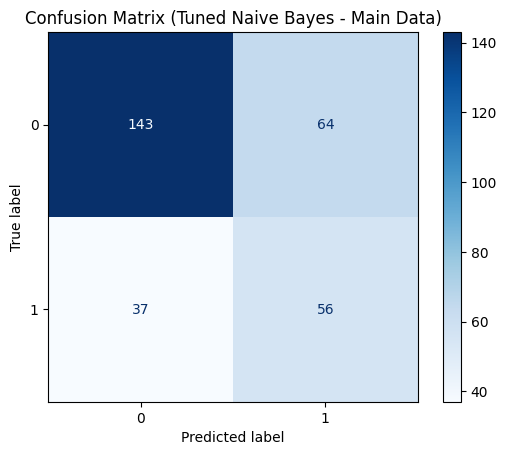


AUC (Tuned Naive Bayes - Main Data): 0.7113


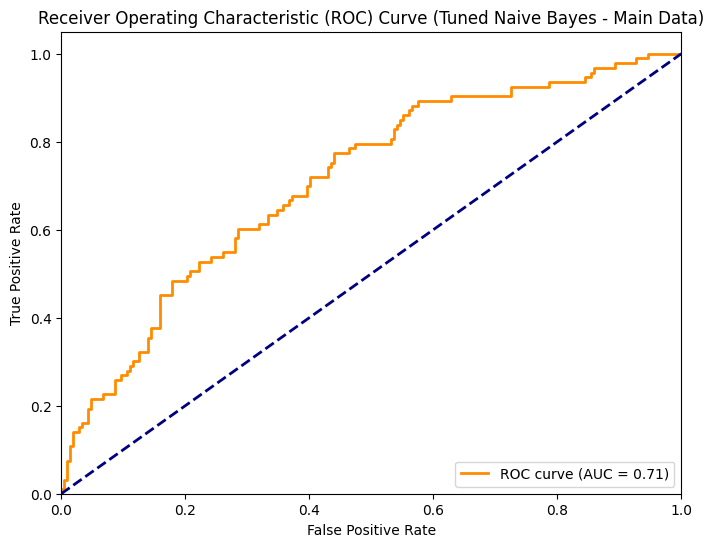


Naive Bayes Hyperparameter tuning on main data completed.


In [154]:
# prompt: From the Naive bayes result (main dataframe), do hyper parameter tuning with it

import matplotlib.pyplot as plt
# --- Hyperparameter Tuning for Naive Bayes on Main Data using Pipeline ---
# Naive Bayes models typically have very few hyperparameters to tune.
# Gaussian Naive Bayes has the 'var_smoothing' parameter, which adds a small value
# to the variance to avoid zero variances (which can cause issues).

print("\nStarting GridSearchCV for Naive Bayes on Main Data...")

# Define the parameter grid for GridSearchCV for Naive Bayes
# 'var_smoothing' is the only significant hyperparameter for GaussianNB
param_grid_nb_main = {
    'gaussiannb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] # Explore different smoothing values
}

# Create a pipeline that includes SMOTE, Scaling, and the Naive Bayes model
# It's important to scale for GaussianNB as it assumes features are normally distributed,
# and scaling helps ensure features are on a similar scale, although Naive Bayes is
# less sensitive to scaling than distance-based methods like KNN or SVM.
# SMOTE should be inside the pipeline for correct cross-validation.
pipeline_nb_main = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE
    ('gaussiannb', GaussianNB())        # Gaussian Naive Bayes model
])

# Initialize GridSearchCV for Naive Bayes
grid_search_nb_main = GridSearchCV(estimator=pipeline_nb_main,
                                   param_grid=param_grid_nb_main,
                                   cv=5,
                                   scoring='roc_auc', # Use ROC AUC due to potential imbalance
                                   verbose=2, # Increase verbosity to see progress
                                   n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data (from df)
# The pipeline handles SMOTE and scaling internally for each fold
grid_search_nb_main.fit(X_train_main, y_train_main) # Use the original X_train_main, y_train_main derived from 'df'

# Get the best parameters and the best score for Naive Bayes
print("\nBest parameters found by GridSearchCV for Naive Bayes (Main Data):")
print(grid_search_nb_main.best_params_)
print("\nBest cross-validation score (ROC AUC) for Naive Bayes (Main Data):")
print(grid_search_nb_main.best_score_)

# Get the best Naive Bayes model from the grid search
best_nb_model_tuned_main = grid_search_nb_main.best_estimator_

# Evaluate the best tuned Naive Bayes model on the test set
# The pipeline handles scaling internally for prediction
y_pred_nb_tuned_main = best_nb_model_tuned_main.predict(X_test_main) # Use the original X_test_main derived from 'df'
y_prob_nb_tuned_main = best_nb_model_tuned_main.predict_proba(X_test_main)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best Tuned Naive Bayes model (Main Data - using pipeline):")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_nb_tuned_main))

# Confusion Matrix for tuned Naive Bayes model
cm_nb_tuned_main = confusion_matrix(y_test_main, y_pred_nb_tuned_main)
print("\nConfusion Matrix (Tuned Naive Bayes - Main Data):")
print(cm_nb_tuned_main)

# Plot Confusion Matrix for tuned Naive Bayes model
disp_nb_tuned_main = ConfusionMatrixDisplay(confusion_matrix=cm_nb_tuned_main, display_labels=best_nb_model_tuned_main.classes_)
disp_nb_tuned_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Naive Bayes - Main Data)')
plt.show()

# ROC Curve and AUC for tuned Naive Bayes model
fpr_nb_tuned_main, tpr_nb_tuned_main, thresholds_nb_tuned_main = roc_curve(y_test_main, y_prob_nb_tuned_main)
auc_nb_tuned_main = roc_auc_score(y_test_main, y_prob_nb_tuned_main)

print(f"\nAUC (Tuned Naive Bayes - Main Data): {auc_nb_tuned_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_tuned_main, tpr_nb_tuned_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_nb_tuned_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned Naive Bayes - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nNaive Bayes Hyperparameter tuning on main data completed.")



Random Forest Model Evaluation on Main Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       207
           1       0.52      0.48      0.50        93

    accuracy                           0.70       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.69      0.70      0.70       300


Confusion Matrix (Random Forest - Main Data):
[[165  42]
 [ 48  45]]


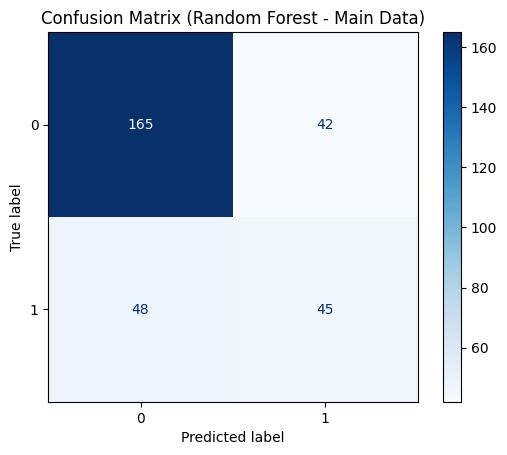


Random Forest AUC (Main Data): 0.7251


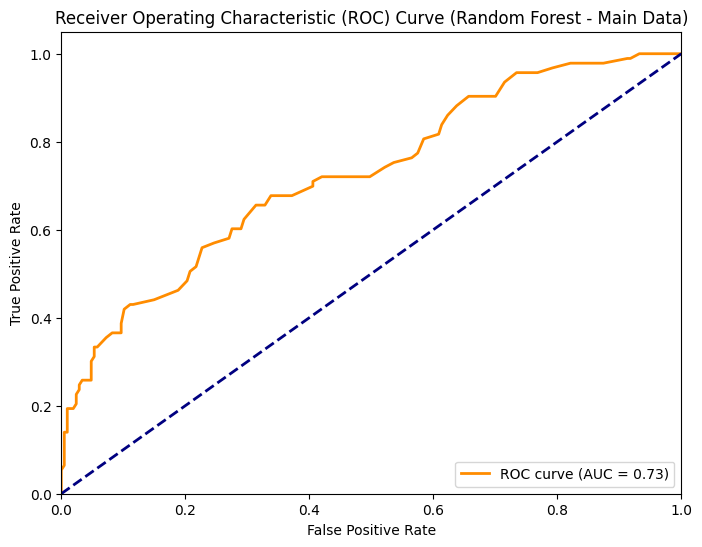


Random Forest model training and evaluation on main data completed.

Starting GridSearchCV for Random Forest on Main Data...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best parameters found by GridSearchCV for Random Forest (Main Data):
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}

Best cross-validation score (ROC AUC) for Random Forest (Main Data):
0.73050327567436

Evaluation of the best Tuned Random Forest model (Main Data - using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       207
           1       0.54      0.53      0.53        93

    accuracy                           0.71       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.71      0.71      0.71       3

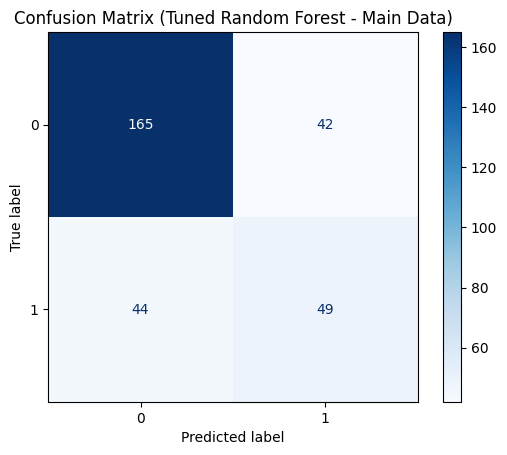


AUC (Tuned Random Forest - Main Data): 0.7341


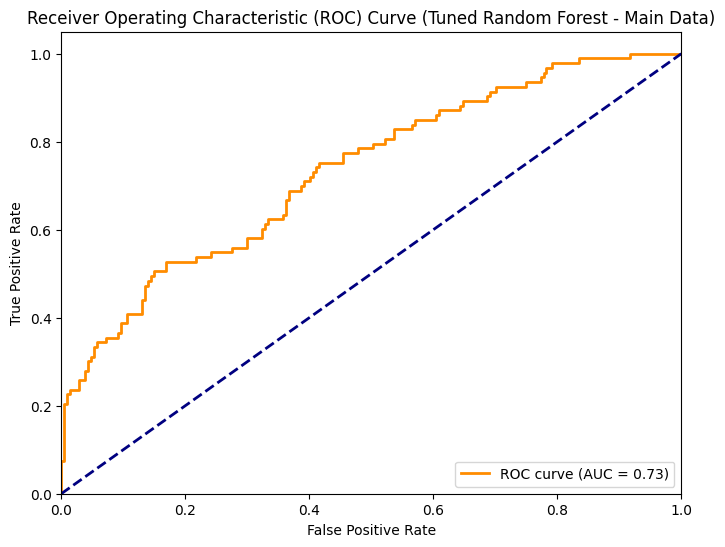


Random Forest Hyperparameter tuning on main data completed.


In [155]:
# prompt: from the same training and test as the logistic regression (main dataframe), create a machine learning model using Random Forest

import matplotlib.pyplot as plt
# --- Random Forest Model Training and Evaluation on Main Data ---

# Initialize the Random Forest model
# Using the same scaled SMOTEd data as the Logistic Regression model
rf_model_main = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled SMOTEd training data (from the main dataframe split)
# X_train_scaled_main and y_train_smote_main were created from the original 'df'
rf_model_main.fit(X_train_scaled_main, y_train_smote_main)

# Make predictions on the scaled testing data (from the main dataframe split)
# X_test_scaled_main was created from the original 'df' test split
y_pred_rf_main = rf_model_main.predict(X_test_scaled_main)

# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation on Main Data:")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_rf_main)) # Use y_test_main for evaluation

# Confusion Matrix for Random Forest
cm_rf_main = confusion_matrix(y_test_main, y_pred_rf_main)
print("\nConfusion Matrix (Random Forest - Main Data):")
print(cm_rf_main)

# Plot Confusion Matrix for Random Forest
disp_rf_main = ConfusionMatrixDisplay(confusion_matrix=cm_rf_main, display_labels=rf_model_main.classes_)
disp_rf_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest - Main Data)')
plt.show()

# ROC Curve and AUC for Random Forest
# Get probability scores for the positive class
y_prob_rf_main = rf_model_main.predict_proba(X_test_scaled_main)[:, 1]
fpr_rf_main, tpr_rf_main, thresholds_rf_main = roc_curve(y_test_main, y_prob_rf_main) # Use y_test_main for evaluation
auc_rf_main = roc_auc_score(y_test_main, y_prob_rf_main)

print(f"\nRandom Forest AUC (Main Data): {auc_rf_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_main, tpr_rf_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nRandom Forest model training and evaluation on main data completed.")

# --- Hyperparameter Tuning for Random Forest on Main Data using Pipeline ---

print("\nStarting GridSearchCV for Random Forest on Main Data...")

# Define the parameter grid for GridSearchCV for Random Forest
param_grid_rf_main = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__criterion': ['gini', 'entropy']
}

# Create a pipeline that includes SMOTE, Scaling, and the Random Forest model
# SMOTE and scaling are handled correctly within cross-validation by ImbPipeline
pipeline_rf_main = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE (can be beneficial but less crucial for RF)
    ('randomforestclassifier', RandomForestClassifier(random_state=42)) # Random Forest model
])

# Initialize GridSearchCV for Random Forest
grid_search_rf_main = GridSearchCV(estimator=pipeline_rf_main,
                                   param_grid=param_grid_rf_main,
                                   cv=5,
                                   scoring='roc_auc', # Use ROC AUC due to potential imbalance
                                   verbose=2, # Increase verbosity to see progress
                                   n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data (from df)
# The pipeline handles SMOTE and scaling internally for each fold
grid_search_rf_main.fit(X_train_main, y_train_main) # Use the original X_train_main, y_train_main derived from 'df'

# Get the best parameters and the best score for Random Forest
print("\nBest parameters found by GridSearchCV for Random Forest (Main Data):")
print(grid_search_rf_main.best_params_)
print("\nBest cross-validation score (ROC AUC) for Random Forest (Main Data):")
print(grid_search_rf_main.best_score_)

# Get the best Random Forest model from the grid search
best_rf_model_tuned_main = grid_search_rf_main.best_estimator_

# Evaluate the best tuned Random Forest model on the test set
# The pipeline handles scaling internally for prediction
y_pred_rf_tuned_main = best_rf_model_tuned_main.predict(X_test_main) # Use the original X_test_main derived from 'df'
y_prob_rf_tuned_main = best_rf_model_tuned_main.predict_proba(X_test_main)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best Tuned Random Forest model (Main Data - using pipeline):")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_rf_tuned_main))

# Confusion Matrix for tuned Random Forest model
cm_rf_tuned_main = confusion_matrix(y_test_main, y_pred_rf_tuned_main)
print("\nConfusion Matrix (Tuned Random Forest - Main Data):")
print(cm_rf_tuned_main)

# Plot Confusion Matrix for tuned Random Forest model
disp_rf_tuned_main = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned_main, display_labels=best_rf_model_tuned_main.classes_)
disp_rf_tuned_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Random Forest - Main Data)')
plt.show()

# ROC Curve and AUC for tuned Random Forest model
fpr_rf_tuned_main, tpr_rf_tuned_main, thresholds_rf_tuned_main = roc_curve(y_test_main, y_prob_rf_tuned_main)
auc_rf_tuned_main = roc_auc_score(y_test_main, y_prob_rf_tuned_main)

print(f"\nAUC (Tuned Random Forest - Main Data): {auc_rf_tuned_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned_main, tpr_rf_tuned_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_rf_tuned_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned Random Forest - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nRandom Forest Hyperparameter tuning on main data completed.")



K Nearest Neighbor Model Evaluation on Main Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       207
           1       0.48      0.73      0.58        93

    accuracy                           0.67       300
   macro avg       0.66      0.69      0.65       300
weighted avg       0.73      0.67      0.68       300


Confusion Matrix (K Nearest Neighbor - Main Data):
[[133  74]
 [ 25  68]]


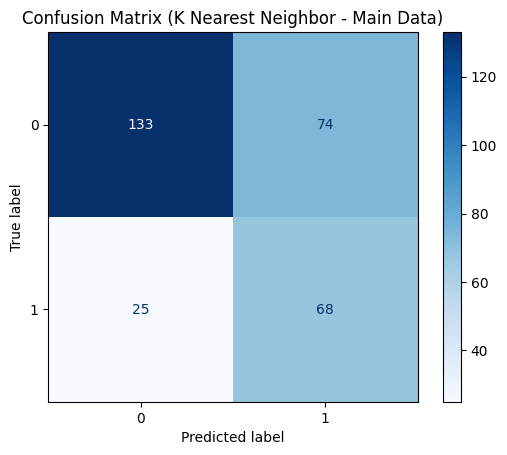


K Nearest Neighbor AUC (Main Data): 0.7238


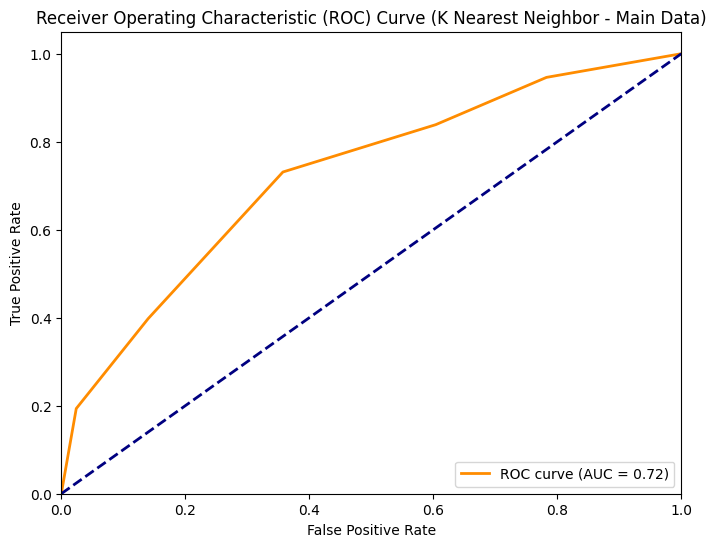


K Nearest Neighbor model training and evaluation on main data completed.

Starting GridSearchCV for K Nearest Neighbor on Main Data...
Fitting 5 folds for each of 84 candidates, totalling 420 fits

Best parameters found by GridSearchCV for K Nearest Neighbor (Main Data):
{'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 15, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}

Best cross-validation score (ROC AUC) for K Nearest Neighbor (Main Data):
0.7047558357919804

Evaluation of the best Tuned K Nearest Neighbor model (Main Data - using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       207
           1       0.45      0.68      0.54        93

    accuracy                           0.65       300
   macro avg       0.63      0.66      0.63       300
weighted avg       0.70      0.65      0.66       300


Confusion Matrix (Tuned K Nearest N

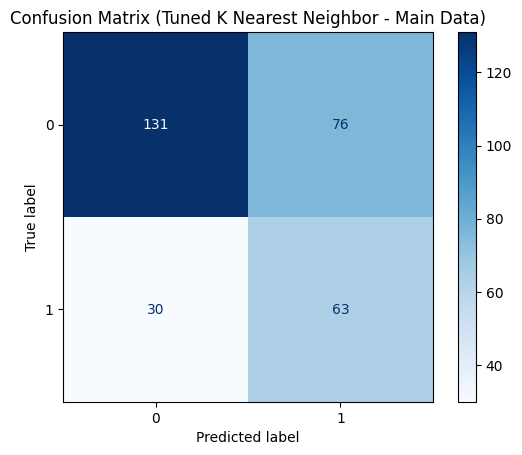


AUC (Tuned K Nearest Neighbor - Main Data): 0.7202


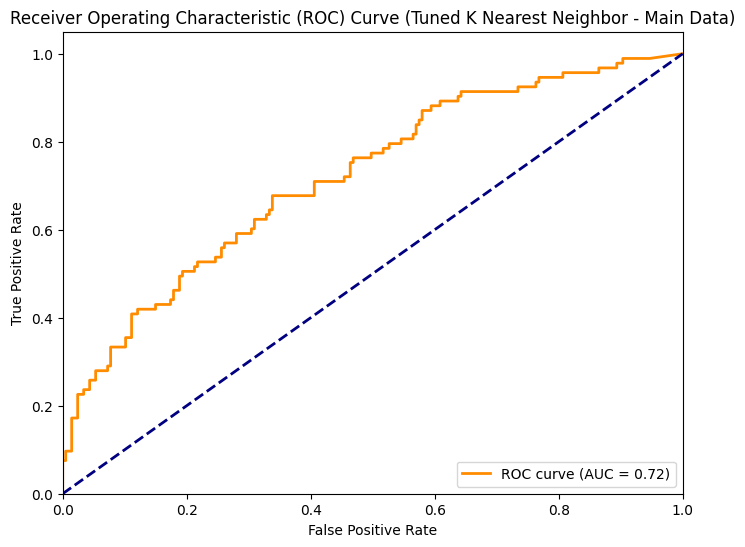


K Nearest Neighbor Hyperparameter tuning on main data completed.


In [156]:
# prompt: from the same training and test as the logistic regression (main dataframe), create a machine learning model using K Nearest Neighbor

import matplotlib.pyplot as plt
# --- K Nearest Neighbor Model Training and Evaluation on Main Data ---

# Initialize the K Nearest Neighbor model
# Using the same scaled SMOTEd data as the other models trained on the main data split
# We can start with a default number of neighbors (e.g., 5)
knn_model_main = KNeighborsClassifier(n_neighbors=5)

# Train the model using the scaled SMOTEd training data (from the main dataframe split)
# X_train_scaled_main and y_train_smote_main were created from the original 'df'
knn_model_main.fit(X_train_scaled_main, y_train_smote_main)

# Make predictions on the scaled testing data (from the main dataframe split)
# X_test_scaled_main was created from the original 'df' test split
y_pred_knn_main = knn_model_main.predict(X_test_scaled_main)

# Evaluate the K Nearest Neighbor model
print("\nK Nearest Neighbor Model Evaluation on Main Data:")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_knn_main)) # Use y_test_main for evaluation

# Confusion Matrix for K Nearest Neighbor
cm_knn_main = confusion_matrix(y_test_main, y_pred_knn_main)
print("\nConfusion Matrix (K Nearest Neighbor - Main Data):")
print(cm_knn_main)

# Plot Confusion Matrix for K Nearest Neighbor
disp_knn_main = ConfusionMatrixDisplay(confusion_matrix=cm_knn_main, display_labels=knn_model_main.classes_)
disp_knn_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (K Nearest Neighbor - Main Data)')
plt.show()

# ROC Curve and AUC for K Nearest Neighbor
# Get probability scores for the positive class
y_prob_knn_main = knn_model_main.predict_proba(X_test_scaled_main)[:, 1]
fpr_knn_main, tpr_knn_main, thresholds_knn_main = roc_curve(y_test_main, y_prob_knn_main) # Use y_test_main for evaluation
auc_knn_main = roc_auc_score(y_test_main, y_prob_knn_main)

print(f"\nK Nearest Neighbor AUC (Main Data): {auc_knn_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_main, tpr_knn_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_knn_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (K Nearest Neighbor - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nK Nearest Neighbor model training and evaluation on main data completed.")


# --- Hyperparameter Tuning for K Nearest Neighbor on Main Data using Pipeline ---

print("\nStarting GridSearchCV for K Nearest Neighbor on Main Data...")

# Define the parameter grid for GridSearchCV for K Nearest Neighbor
param_grid_knn_main = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15], # Explore a range of odd neighbors
    'kneighborsclassifier__weights': ['uniform', 'distance'],    # Explore weighting schemes
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'minkowski'], # Explore distance metrics
    'kneighborsclassifier__p': [1, 2] # Power parameter for Minkowski metric. p=1 is Manhattan, p=2 is Euclidean. Only relevant if metric='minkowski'.
}

# Create a pipeline that includes SMOTE, Scaling, and the KNN model
# It's crucial to scale data before applying KNN, as KNN is distance-based.
# SMOTE should be inside the pipeline to prevent data leakage during cross-validation.
pipeline_knn_main = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE (essential for KNN)
    ('kneighborsclassifier', KNeighborsClassifier()) # KNN model
])

# Initialize GridSearchCV for K Nearest Neighbor
grid_search_knn_main = GridSearchCV(estimator=pipeline_knn_main,
                                    param_grid=param_grid_knn_main,
                                    cv=5,
                                    scoring='roc_auc', # Use ROC AUC due to potential imbalance
                                    verbose=2, # Increase verbosity to see progress
                                    n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data (from df)
# The pipeline handles SMOTE and scaling internally for each fold
grid_search_knn_main.fit(X_train_main, y_train_main) # Use the original X_train_main, y_train_main derived from 'df'

# Get the best parameters and the best score for KNN
print("\nBest parameters found by GridSearchCV for K Nearest Neighbor (Main Data):")
print(grid_search_knn_main.best_params_)
print("\nBest cross-validation score (ROC AUC) for K Nearest Neighbor (Main Data):")
print(grid_search_knn_main.best_score_)

# Get the best KNN model from the grid search
best_knn_model_tuned_main = grid_search_knn_main.best_estimator_

# Evaluate the best tuned KNN model on the test set
# The pipeline handles scaling internally for prediction
y_pred_knn_tuned_main = best_knn_model_tuned_main.predict(X_test_main) # Use the original X_test_main derived from 'df'
y_prob_knn_tuned_main = best_knn_model_tuned_main.predict_proba(X_test_main)[:, 1] # Get probabilities for ROC AUC

print("\nEvaluation of the best Tuned K Nearest Neighbor model (Main Data - using pipeline):")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_knn_tuned_main))

# Confusion Matrix for tuned KNN model
cm_knn_tuned_main = confusion_matrix(y_test_main, y_pred_knn_tuned_main)
print("\nConfusion Matrix (Tuned K Nearest Neighbor - Main Data):")
print(cm_knn_tuned_main)

# Plot Confusion Matrix for tuned KNN model
disp_knn_tuned_main = ConfusionMatrixDisplay(confusion_matrix=cm_knn_tuned_main, display_labels=best_knn_model_tuned_main.classes_)
disp_knn_tuned_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned K Nearest Neighbor - Main Data)')
plt.show()

# ROC Curve and AUC for tuned KNN model
fpr_knn_tuned_main, tpr_knn_tuned_main, thresholds_knn_tuned_main = roc_curve(y_test_main, y_prob_knn_tuned_main)
auc_knn_tuned_main = roc_auc_score(y_test_main, y_prob_knn_tuned_main)

print(f"\nAUC (Tuned K Nearest Neighbor - Main Data): {auc_knn_tuned_main:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_tuned_main, tpr_knn_tuned_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_knn_tuned_main:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned K Nearest Neighbor - Main Data)')
plt.legend(loc="lower right")
plt.show()

print("\nK Nearest Neighbor Hyperparameter tuning on main data completed.")



Decision Tree Model Evaluation on Main Data:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       207
           1       0.47      0.54      0.50        93

    accuracy                           0.67       300
   macro avg       0.63      0.63      0.63       300
weighted avg       0.68      0.67      0.68       300


Confusion Matrix (Decision Tree - Main Data):
[[151  56]
 [ 43  50]]


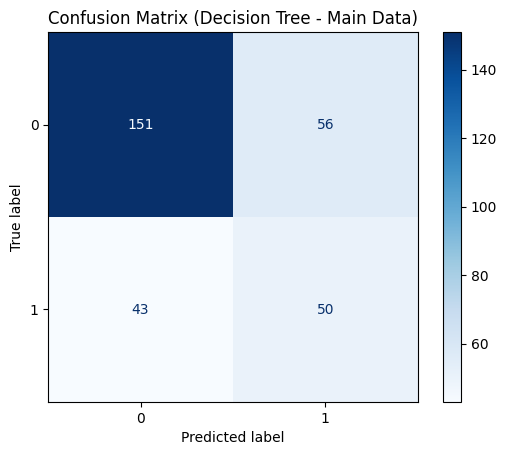


Decision Tree AUC (Main Data): 0.6336


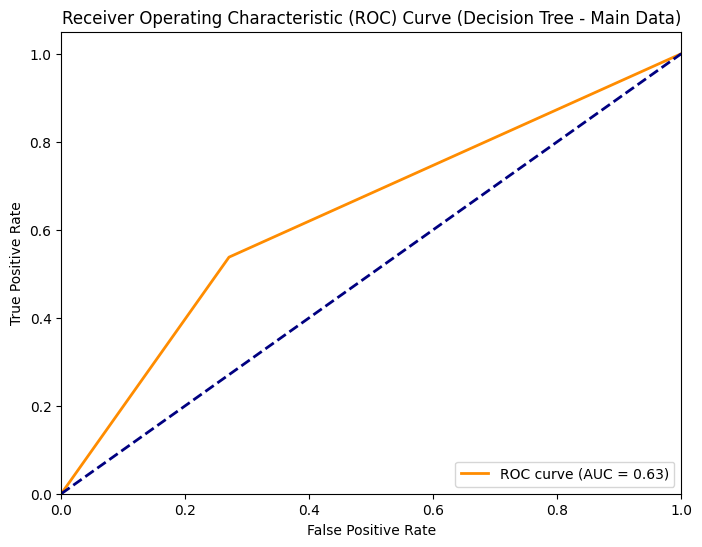


Decision Tree model training and evaluation on main data completed.

Starting GridSearchCV for Decision Tree on Main Data...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

Best parameters found by GridSearchCV for Decision Tree (Main Data):
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_leaf': 4, 'decisiontreeclassifier__min_samples_split': 2}

Best cross-validation score (ROC AUC) for Decision Tree (Main Data):
0.6865349884386028

Evaluation of the best Tuned Decision Tree model (Main Data - using pipeline):
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       207
           1       0.40      0.48      0.44        93

    accuracy                           0.62       300
   macro avg       0.57      0.58      0.57       300
weighted avg       0.64      0.62      0.63       300


Confusion Matrix (Tuned Decision Tree 

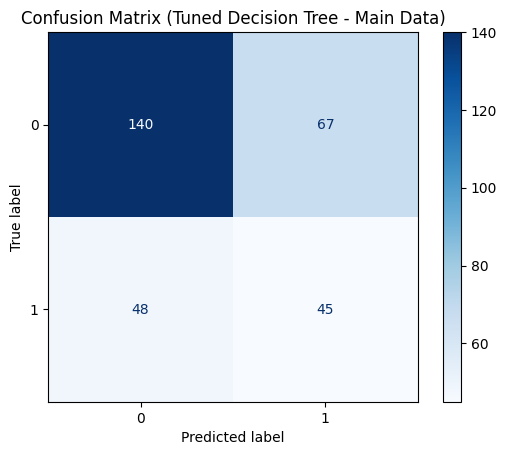


AUC (Tuned Decision Tree - Main Data): 0.6888


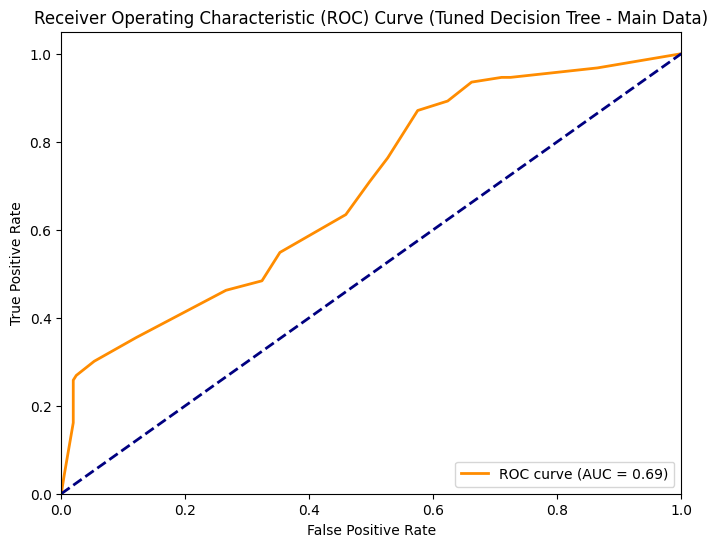


Decision Tree Hyperparameter tuning on main data completed.


In [157]:
# prompt: from the same training and test as the logistic regression (main dataframe), create a machine learning model using Decision tree

import matplotlib.pyplot as plt
# Initialize the Decision Tree model
# Using the same scaled SMOTEd data as the other models trained on the main data split
dt_model_main = DecisionTreeClassifier(random_state=42)

# Train the model using the scaled SMOTEd training data (from the main dataframe split)
# X_train_scaled_main and y_train_smote_main were created from the original 'df'
dt_model_main.fit(X_train_scaled_main, y_train_smote_main)

# Make predictions on the scaled testing data (from the main dataframe split)
# X_test_scaled_main was created from the original 'df' test split
y_pred_dt_main = dt_model_main.predict(X_test_scaled_main)

# Evaluate the Decision Tree model
print("\nDecision Tree Model Evaluation on Main Data:")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_dt_main)) # Use y_test_main for evaluation

# Confusion Matrix for Decision Tree
cm_dt_main = confusion_matrix(y_test_main, y_pred_dt_main)
print("\nConfusion Matrix (Decision Tree - Main Data):")
print(cm_dt_main)

# Plot Confusion Matrix for Decision Tree
disp_dt_main = ConfusionMatrixDisplay(confusion_matrix=cm_dt_main, display_labels=dt_model_main.classes_)
disp_dt_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Decision Tree - Main Data)')
plt.show()

# ROC Curve and AUC for Decision Tree
# Get probability scores for the positive class if the model supports it
if hasattr(dt_model_main, "predict_proba"):
    y_prob_dt_main = dt_model_main.predict_proba(X_test_scaled_main)[:, 1]
    fpr_dt_main, tpr_dt_main, thresholds_dt_main = roc_curve(y_test_main, y_prob_dt_main) # Use y_test_main for evaluation
    auc_dt_main = roc_auc_score(y_test_main, y_prob_dt_main)

    print(f"\nDecision Tree AUC (Main Data): {auc_dt_main:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt_main, tpr_dt_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt_main:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Decision Tree - Main Data)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nDecision Tree model does not support probability prediction.")
    print("Cannot calculate AUC and plot ROC curve.")

print("\nDecision Tree model training and evaluation on main data completed.")

# --- Hyperparameter Tuning for Decision Tree on Main Data using Pipeline ---

print("\nStarting GridSearchCV for Decision Tree on Main Data...")

# Define the parameter grid for GridSearchCV for Decision Tree
# criterion: The function to measure the quality of a split ('gini' or 'entropy').
# max_depth: The maximum depth of the tree. Limits the number of nodes in the tree.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
param_grid_dt_main = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 20], # Include None for unlimited depth
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline that includes SMOTE, Scaling, and the Decision Tree model
# Scaling is generally less critical for tree-based models but can sometimes help.
# SMOTE needs to be inside the pipeline for correct cross-validation.
pipeline_dt_main = ImbPipeline([
    ('smote', SMOTE(random_state=42)), # SMOTE applied on the training fold
    ('scaler', StandardScaler()),       # Scaling applied after SMOTE
    ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42)) # Decision Tree model
])

# Initialize GridSearchCV for Decision Tree
grid_search_dt_main = GridSearchCV(estimator=pipeline_dt_main,
                                   param_grid=param_grid_dt_main,
                                   cv=5,
                                   scoring='roc_auc', # Use ROC AUC due to potential imbalance
                                   verbose=2, # Increase verbosity to see progress
                                   n_jobs=-1) # Use all available CPU cores

# Fit GridSearchCV to the original (non-SMOTEd) training data (from df)
# The pipeline handles SMOTE and scaling internally for each fold
grid_search_dt_main.fit(X_train_main, y_train_main) # Use the original X_train_main, y_train_main derived from 'df'

# Get the best parameters and the best score for Decision Tree
print("\nBest parameters found by GridSearchCV for Decision Tree (Main Data):")
print(grid_search_dt_main.best_params_)
print("\nBest cross-validation score (ROC AUC) for Decision Tree (Main Data):")
print(grid_search_dt_main.best_score_)

# Get the best Decision Tree model from the grid search
best_dt_model_tuned_main = grid_search_dt_main.best_estimator_

# Evaluate the best tuned Decision Tree model on the test set
# The pipeline handles scaling internally for prediction
y_pred_dt_tuned_main = best_dt_model_tuned_main.predict(X_test_main) # Use the original X_test_main derived from 'df'

print("\nEvaluation of the best Tuned Decision Tree model (Main Data - using pipeline):")
print("Classification Report:")
print(classification_report(y_test_main, y_pred_dt_tuned_main))

# Confusion Matrix for tuned Decision Tree model
cm_dt_tuned_main = confusion_matrix(y_test_main, y_pred_dt_tuned_main)
print("\nConfusion Matrix (Tuned Decision Tree - Main Data):")
print(cm_dt_tuned_main)

# Plot Confusion Matrix for tuned Decision Tree model
disp_dt_tuned_main = ConfusionMatrixDisplay(confusion_matrix=cm_dt_tuned_main, display_labels=best_dt_model_tuned_main.classes_)
disp_dt_tuned_main.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Tuned Decision Tree - Main Data)')
plt.show()

# ROC Curve and AUC for tuned Decision Tree model
# Check if the tuned model supports predict_proba
if hasattr(best_dt_model_tuned_main, "predict_proba"):
    y_prob_dt_tuned_main = best_dt_model_tuned_main.predict_proba(X_test_main)[:, 1]
    fpr_dt_tuned_main, tpr_dt_tuned_main, thresholds_dt_tuned_main = roc_curve(y_test_main, y_prob_dt_tuned_main)
    auc_dt_tuned_main = roc_auc_score(y_test_main, y_prob_dt_tuned_main)

    print(f"\nAUC (Tuned Decision Tree - Main Data): {auc_dt_tuned_main:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_dt_tuned_main, tpr_dt_tuned_main, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_dt_tuned_main:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve (Tuned Decision Tree - Main Data)')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nTuned Decision Tree model does not support probability prediction.")
    print("Cannot calculate AUC and plot ROC curve.")

print("\nDecision Tree Hyperparameter tuning on main data completed.")



In [158]:
# prompt: Summarize all model score

import pandas as pd
# Summarize Model Performance

# Create a dictionary to store the performance metrics
model_performance = {}

# Helper function to extract relevant metrics from classification_report
def get_metrics(report):
  report_data = {}
  lines = report.strip().split('\n')
  # Skip header and first line (precision, recall, f1-score for class 0)
  # We are interested in class 1 (positive class for HiringDecision) and overall metrics
  for line in lines[2:]:
    row_data = line.split()
    if len(row_data) > 0:
      if row_data[0] == '1': # Metrics for the positive class (Hired)
        report_data['Precision (Hired)'] = float(row_data[1])
        report_data['Recall (Hired)'] = float(row_data[2])
        report_data['F1-Score (Hired)'] = float(row_data[3])
      elif row_data[0] in ['accuracy', 'macro', 'weighted']:
         # Handles lines like 'accuracy', 'macro avg', 'weighted avg'
         if row_data[0] == 'accuracy':
             report_data['Accuracy'] = float(row_data[1])
         elif row_data[0] == 'macro':
             report_data['Macro Avg F1-Score'] = float(row_data[3])
         elif row_data[0] == 'weighted':
              report_data['Weighted Avg F1-Score'] = float(row_data[3])
  return report_data

# Store performance for each model
# For each model, we'll try to get the tuned version's metrics if available,
# otherwise, we'll use the initial evaluation. We prioritize the models trained
# on the main data ('df') as they are likely the final models used.

# Logistic Regression (Tuned on Main Data)
if 'best_log_reg_model_tuned' in globals():
    tuned_log_reg_report = classification_report(y_test_main, y_pred_tuned)
    model_performance['Logistic Regression (Tuned)'] = {
        **get_metrics(tuned_log_reg_report),
        'AUC': auc_tuned if 'auc_tuned' in globals() else 'N/A',
        'Best Params': grid_search.best_params_ if 'grid_search' in globals() else 'N/A'
    }
elif 'log_reg' in globals(): # Fallback to untuned if tuning failed or skipped
     untuned_log_reg_report = classification_report(y_test_main, y_pred_RM)
     model_performance['Logistic Regression (Untuned)'] = {
         **get_metrics(untuned_log_reg_report),
         'AUC': auc if 'auc' in globals() else 'N/A',
         'Best Params': 'N/A (Untuned)'
     }


# SVM (Tuned on Main Data)
if 'best_svm_model_tuned_main' in globals():
    tuned_svm_report = classification_report(y_test_main, y_pred_svm_tuned_main)
    model_performance['SVM (Tuned)'] = {
        **get_metrics(tuned_svm_report),
        'AUC': auc_svm_tuned_main if 'auc_svm_tuned_main' in globals() else 'N/A',
        'Best Params': grid_search_svm_main.best_params_ if 'grid_search_svm_main' in globals() else 'N/A'
    }
elif 'svm_model_main' in globals(): # Fallback to untuned if tuning failed or skipped
     untuned_svm_report = classification_report(y_test_main, y_pred_svm_main)
     model_performance['SVM (Untuned)'] = {
         **get_metrics(untuned_svm_report),
         'AUC': auc_svm_main if 'auc_svm_main' in globals() else 'N/A',
         'Best Params': 'N/A (Untuned)'
     }

# Naive Bayes (Tuned on Main Data) - Tuning is simple for NB, so tuned is likely used
if 'best_nb_model_tuned_main' in globals():
    tuned_nb_report = classification_report(y_test_main, y_pred_nb_tuned_main)
    model_performance['Naive Bayes (Tuned)'] = {
        **get_metrics(tuned_nb_report),
        'AUC': auc_nb_tuned_main if 'auc_nb_tuned_main' in globals() else 'N/A',
        'Best Params': grid_search_nb_main.best_params_ if 'grid_search_nb_main' in globals() else 'N/A'
    }
elif 'nb_model_main' in globals(): # Fallback to untuned if tuning failed or skipped
    untuned_nb_report = classification_report(y_test_main, y_pred_nb_main)
    model_performance['Naive Bayes (Untuned)'] = {
        **get_metrics(untuned_nb_report),
        'AUC': auc_nb_main if 'auc_nb_main' in globals() else 'N/A',
        'Best Params': 'N/A (Untuned)'
    }


# Random Forest (Tuned on Main Data)
if 'best_rf_model_tuned_main' in globals():
    tuned_rf_report = classification_report(y_test_main, y_pred_rf_tuned_main)
    model_performance['Random Forest (Tuned)'] = {
        **get_metrics(tuned_rf_report),
        'AUC': auc_rf_tuned_main if 'auc_rf_tuned_main' in globals() else 'N/A',
        'Best Params': grid_search_rf_main.best_params_ if 'grid_search_rf_main' in globals() else 'N/A'
    }
elif 'rf_model_main' in globals(): # Fallback to untuned if tuning failed or skipped
    untuned_rf_report = classification_report(y_test_main, y_pred_rf_main)
    model_performance['Random Forest (Untuned)'] = {
        **get_metrics(untuned_rf_report),
        'AUC': auc_rf_main if 'auc_rf_main' in globals() else 'N/A',
        'Best Params': 'N/A (Untuned)'
    }

# Decision Tree (Tuned on Main Data)
if 'best_dt_model_tuned_main' in globals():
    tuned_dt_report = classification_report(y_test_main, y_pred_dt_tuned_main)
    metrics_dt_tuned = get_metrics(tuned_dt_report)
    # Add AUC if available
    if 'auc_dt_tuned_main' in globals():
        metrics_dt_tuned['AUC'] = auc_dt_tuned_main
    else:
         metrics_dt_tuned['AUC'] = 'N/A (No Prob Support)' # Or handle models without predict_proba
    model_performance['Decision Tree (Tuned)'] = {
        **metrics_dt_tuned,
        'Best Params': grid_search_dt_main.best_params_ if 'grid_search_dt_main' in globals() else 'N/A'
    }
elif 'dt_model_main' in globals(): # Fallback to untuned if tuning failed or skipped
    untuned_dt_report = classification_report(y_test_main, y_pred_dt_main)
    metrics_dt_untuned = get_metrics(untuned_dt_report)
    # Add AUC if available
    if 'auc_dt_main' in globals():
        metrics_dt_untuned['AUC'] = auc_dt_main
    else:
         metrics_dt_untuned['AUC'] = 'N/A (No Prob Support)'
    model_performance['Decision Tree (Untuned)'] = {
        **metrics_dt_untuned,
        'Best Params': 'N/A (Untuned)'
    }


# K Nearest Neighbor (Tuned on Main Data)
if 'best_knn_model_tuned_main' in globals():
    tuned_knn_report = classification_report(y_test_main, y_pred_knn_tuned_main)
    model_performance['K Nearest Neighbor (Tuned)'] = {
        **get_metrics(tuned_knn_report),
        'AUC': auc_knn_tuned_main if 'auc_knn_tuned_main' in globals() else 'N/A',
        'Best Params': grid_search_knn_main.best_params_ if 'grid_search_knn_main' in globals() else 'N/A'
    }
elif 'knn_model_main' in globals(): # Fallback to untuned if tuning failed or skipped
    untuned_knn_report = classification_report(y_test_main, y_pred_knn_main)
    model_performance['K Nearest Neighbor (Untuned)'] = {
        **get_metrics(untuned_knn_report),
        'AUC': auc_knn_main if 'auc_knn_main' in globals() else 'N/A',
        'Best Params': 'N/A (Untuned)'
    }


# Convert the dictionary to a pandas DataFrame for better visualization
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Print the summary table
print("\n--- Model Performance Summary (Evaluated on Test Set from Main Data) ---")
performance_df

# Optional: Save the summary to a file
# performance_df.to_csv('model_performance_summary.csv')



--- Model Performance Summary (Evaluated on Test Set from Main Data) ---


Precision (Hired)  Recall (Hired)  \
Logistic Regression (Tuned)               0.48            0.60   
SVM (Tuned)                               0.47            0.62   
Naive Bayes (Tuned)                       0.47            0.60   
Random Forest (Tuned)                     0.54            0.53   
Decision Tree (Tuned)                     0.40            0.48   
K Nearest Neighbor (Tuned)                0.45            0.68   

                             F1-Score (Hired)  Accuracy  Macro Avg F1-Score  \
Logistic Regression (Tuned)              0.54      0.68                0.66   
SVM (Tuned)                              0.54      0.67                0.65   
Naive Bayes (Tuned)                      0.53      0.66                0.65   
Random Forest (Tuned)                    0.53      0.71                0.66   
Decision Tree (Tuned)                    0.44      0.62                0.58   
K Nearest Neighbor (Tuned)               0.54      0.65                0.66   

                             Weighted Avg F1-Score       AUC  \
Logistic Regression (Tuned)                   0.68  0.712482   
SVM (Tuned)                                   0.67  0.708431   
Naive Bayes (Tuned)                           0.66  0.711288   
Random Forest (Tuned)                         0.71  0.734144   
Decision Tree (Tuned)                         0.62  0.688795   
K Nearest Neighbor (Tuned)                    0.65  0.720248   

                                                                   Best Params  
Logistic Regression (Tuned)  {'logisticregression__C': 1, 'logisticregressi...  
SVM (Tuned)                  {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k...  
Naive Bayes (Tuned)                       {'gaussiannb__var_smoothing': 1e-09}  
Random Forest (Tuned)        {'randomforestclassifier__criterion': 'gini', ...  
Decision Tree (Tuned)        {'decisiontreeclassifier__criterion': 'entropy...  
K Nearest Neighbor (Tuned)   {'kneighborsclassifier__metric': 'euclidean', ...